# Introduction

Look at other studies here

The main goal for this analysis will be to show if there is any corrolation between the weather and collisions in new york.

# Methodology

## DATA Gathering


###  Weather Data Collection
The data collected was from 2013 to 2023, the below code was used to collect the weather data:

In [ ]:
CREATE VIEW `uhi-project-419923.Assessment_DATA.weather_2013_2023` AS
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp,slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, rain_drizzle, snow_ice_pellets, hail, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2013` WHERE stn='725060'
union all
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp,slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, rain_drizzle, snow_ice_pellets, hail, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2014` WHERE stn='725060' AND wban='14756'
union all
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp,slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, rain_drizzle, snow_ice_pellets, hail, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2015` WHERE stn='725060'
union all
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp,slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, rain_drizzle, snow_ice_pellets, hail, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2016` WHERE stn='725060'
union all
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp,slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, rain_drizzle, snow_ice_pellets, hail, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2017` WHERE stn='725060'
union all
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp,slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, rain_drizzle, snow_ice_pellets, hail, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2018` WHERE stn='725060'
union all
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp,slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, rain_drizzle, snow_ice_pellets, hail, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2019` WHERE stn='725060'
union all
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp,slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, rain_drizzle, snow_ice_pellets, hail, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2020` WHERE stn='725060'
union all
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp,slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, rain_drizzle, snow_ice_pellets, hail, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2021` WHERE stn='725060'
union all
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp,slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, rain_drizzle, snow_ice_pellets, hail, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2022` WHERE stn='725060'
union all
SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp,slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, rain_drizzle, snow_ice_pellets, hail, thunder
FROM `bigquery-public-data.noaa_gsod.gsod2023` WHERE stn='725060'


ERROR: Error in parse(text = x, srcfile = src): <text>:1:8: unexpected symbol
1: CREATE VIEW
           ^


The below screenshot validates that the data has been collected correctly for each year, giving us 365 days per year and 366 days per leap year;
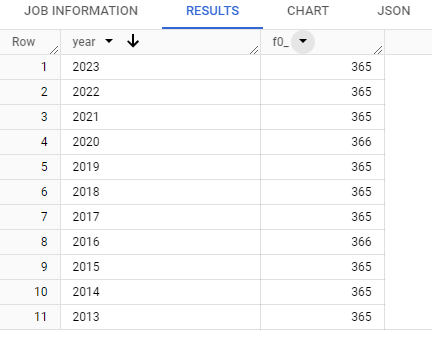

### Collision Data
This section will cover collecting the collision data.

In [ ]:
CREATE VIEW `uhi-project-419923.Assessment_DATA.collision_dataPed` AS
SELECT CAST(timestamp as DATE) as collision_date, COUNT(CAST(timestamp as DATE)) AS NUM_COLLISIONS, SUM(CAST(number_of_pedestrians_injured as INT64)) + SUM(CAST(number_of_pedestrians_killed as INT64)) as NUM_PEDESTRIANS
FROM `bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions`
Group by collision_date

ERROR: Error in parse(text = x, srcfile = src): <text>:1:8: unexpected symbol
1: CREATE VIEW
           ^


This provides us with a view with the collisions date, number of collisions on that day and the number of pedestrians involved with the collision. Below image is a sample of the data.

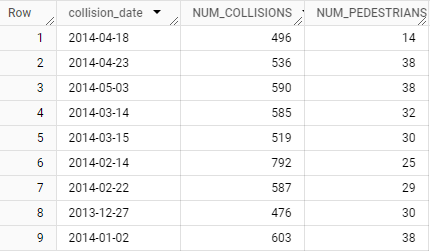

To allow us to do some further analytics on which day a collision occured the view was amended to show which day the collision occured using the below query.

In [ ]:
CREATE VIEW `uhi-project-419923.Assessment_DATA.collision_data_count_finalv2` AS
SELECT FORMAT_DATE("%u", collision_date) as day, collision_date, NUM_COLLISIONS, NUM_PEDESTRIANS
from `uhi-project-419923.Assessment_DATA.collision_dataPed`

Below is a sample of the data:

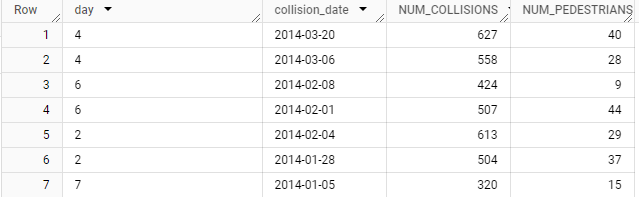

The last step is to create a table joining the two views together with the below query.

In [ ]:
CREATE TABLE `uhi-project-419923.Assessment_DATA.collated_collision_datav2` AS
SELECT day, year, mo, da, collision_date, temp, dewp,slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, rain_drizzle, snow_ice_pellets, hail, thunder, NUM_COLLISIONS, NUM_PEDESTRIANS
FROM `uhi-project-419923.Assessment_DATA.weather_2013_2023` as weather, `uhi-project-419923.Assessment_DATA.collision_data_count_finalv2` as complaints
WHERE complaints.collision_date = weather.date;

This provides you with the csv linked in the data info section.

## Data Investigation


### Data Import
In this section we will cover importing the data from github as well as providing definitations for each of the headers of the imported data.

In order to complete some investigation into the data structure and corrolation between data columns we must import the data. Firstly we will save this into a public github and extract the raw link.

In [ ]:
lst <- read.csv("https://raw.githubusercontent.com/GreedyOrc/055756_DataAnalytics/main/results-2013-2023v2.csv", stringsAsFactors = TRUE)


After importing the data we will check the headers and the first few rows look correct. The headers are displaying as expected and the first 6 rows of data are looking correct so we will continue.

In [ ]:
head(lst)

day year mo da collision_date temp dewp slp    visib wdsp ⋯ min  prcp sndp 
1 2   2013 1  1  01/01/2013     38.0 25.6 1008.8 10.0  15.0 ⋯ 33.1 0.00 999.9
2 3   2013 1  2  02/01/2013     27.5 12.1 1013.4 10.0  12.4 ⋯ 21.9 0.00 999.9
3 4   2013 1  3  03/01/2013     21.8  7.8 1018.1 10.0   9.8 ⋯ 16.0 0.00 999.9
4 5   2013 1  4  04/01/2013     32.2 21.1 1015.2 10.0  11.3 ⋯ 24.1 0.00 999.9
5 6   2013 1  5  05/01/2013     37.3 24.5 1017.3 10.0  13.2 ⋯ 30.9 0.00 999.9
6 7   2013 1  6  06/01/2013     35.7 31.3 1019.7  9.8   5.9 ⋯ 23.0 0.01 999.9
  fog rain_drizzle snow_ice_pellets hail thunder NUM_COLLISIONS NUM_PEDESTRIANS
1 0   0            0                0    0       381            34             
2 0   0            0                0    0       480            22             
3 0   0            0                0    0       549            43             
4 0   0            0                0    0       505            33             
5 0   0            0                0    0       389            29             
6 0   1            0                0    0       393            25

The below contains details for each of the headers. These definitations are taken from the data source on google's big query.

Table Details:

collisions_date: Date of when the collision occured

temp - Mean temperature for the day in degrees Fahrenheit to tenths. Missing = 9999.9

dewp - Mean dew point for the day in degreesm Fahrenheit to tenths. Missing = 9999.9

slp - Mean sea level pressure for the day in millibars to tenths. Missing = 9999.9

visib - Mean visibility for the day in miles to tenths. Missing = 999.9

wdsp - Mean wind speed for the day in knots to tenths. Missing = 999.9

mxpsd - Maximum sustained wind speed reported for the day in knots to tenths. Missing = 999.9

gust - Maximum wind gust reported for the day in knots to tenths. Missing = 999.9

max - Maximum temperature reported during the day in Fahrenheit to tenths--time of max temp report varies by country and region, so this will sometimes not be the max for the calendar day. Missing = 9999.9

min - Minimum temperature reported during the day in Fahrenheit to tenths--time of min temp report varies by country and region, so this will sometimes not be the min for the calendar day. Missing = 9999.9

prcp - Total precipitation (rain and/or melted snow) reported during the day in inches and hundredths; will usually not end with the midnight observation--i.e., may include latter part of previous day. .00 indicates no measurable precipitation (includes a trace). Missing = 99.99 Note: Many stations do not report '0' on days with no precipitation--therefore, '99.99' will often appear on these days. Also, for example, a station may only report a 6-hour amount for the period during which rain fell. See Flag field for source of data

sndp - Snow depth in inches to tenths--last report for the day if reported more than once. Missing = 999.9 Note: Most stations do not report '0' ondays with no snow on the ground--therefore, '999.9' will often appear on these days

fog - Indicators (1 = yes, 0 = no/not reported) for the occurrence during the day

rain_drizzle - Indicators (1 = yes, 0 = no/not reported) for the occurrence during the day

show_ice_pellets - Indicators (1 = yes, 0 = no/not reported) for the occurrence during the day

hail - Indicators (1 = yes, 0 = no/not reported) for the occurrence during the day

thunder - Indicators (1 = yes, 0 = no/not reported) for the occurrence during the day

NUM_COLLISIONS - Total number of collisions for that day

NUM_PEDESTRAINS - total number of pedestrains involved in the collisions



### Summary of Imported Data
Below shows a summary of the data, this shows the min, max and mean of the data. This provides us with a good overview of the data when looking for discrepancies. For example, we already know that for some columns when data is missing for a day its populated with 9999.99, we can see that listed below for the max value. This quickly allows us to see some columns that we might need to correct the data for.

In [ ]:
summary(lst)

      day             year            mo               da       
 Min.   :1.000   Min.   :2013   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2015   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :4.000   Median :2018   Median : 7.000   Median :16.00  
 Mean   :4.001   Mean   :2018   Mean   : 6.524   Mean   :15.73  
 3rd Qu.:6.000   3rd Qu.:2021   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2023   Max.   :12.000   Max.   :31.00  
                                                                
    collision_date      temp            dewp               slp         
 01/01/2013:   1   Min.   : 5.80   Min.   :  -10.40   Min.   :  989.1  
 01/01/2014:   1   1st Qu.:41.60   1st Qu.:   33.00   1st Qu.: 1011.9  
 01/01/2015:   1   Median :52.50   Median :   45.80   Median : 1016.5  
 01/01/2016:   1   Mean   :52.35   Mean   :   47.54   Mean   : 1023.3  
 01/01/2017:   1   3rd Qu.:64.60   3rd Qu.:   59.20   3rd Qu.: 1021.6  
 01/01/2018:   1   Max.   :80.40   Max.   : 9999

In [ ]:
nrow(lst)

[1] 4017

### Inital Data Investigation
Here we take a quick look into the data. We end up discoving that the data has a big variation. To combat this we end up splitting the data into two, pre and post world event.

#### Number of Collisions vs Day of the week
Here we have a quick look at the data of number of collisions and a week day, as a tester for our data. Our overall goal is to look at the corrolation between the number of collisions and weather however this will allow us to start looking at some data.



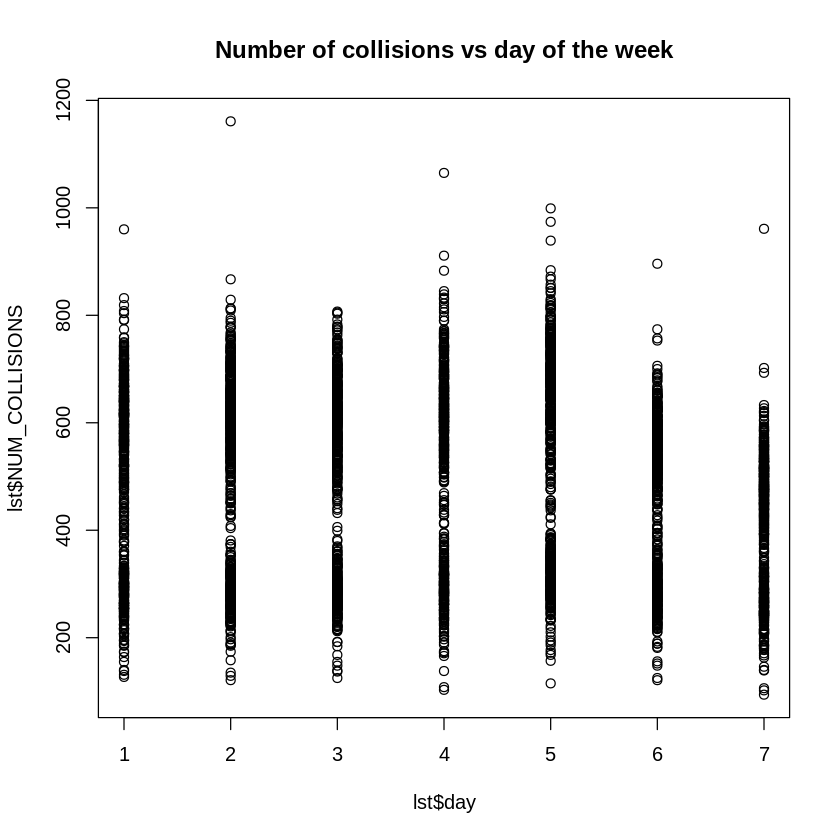

In [ ]:
plot(lst$day, lst$NUM_COLLISIONS, main="Number of collisions vs day of the week",)

This data is shown for Monday(1) to Sunday(7). The spread of the collisions show a slight increase in the number of collisions on the Friday and drops over the weekend. We can also see this there is a what looks like a split in the data. Lets investigate further to see if we can see what is causing the split.

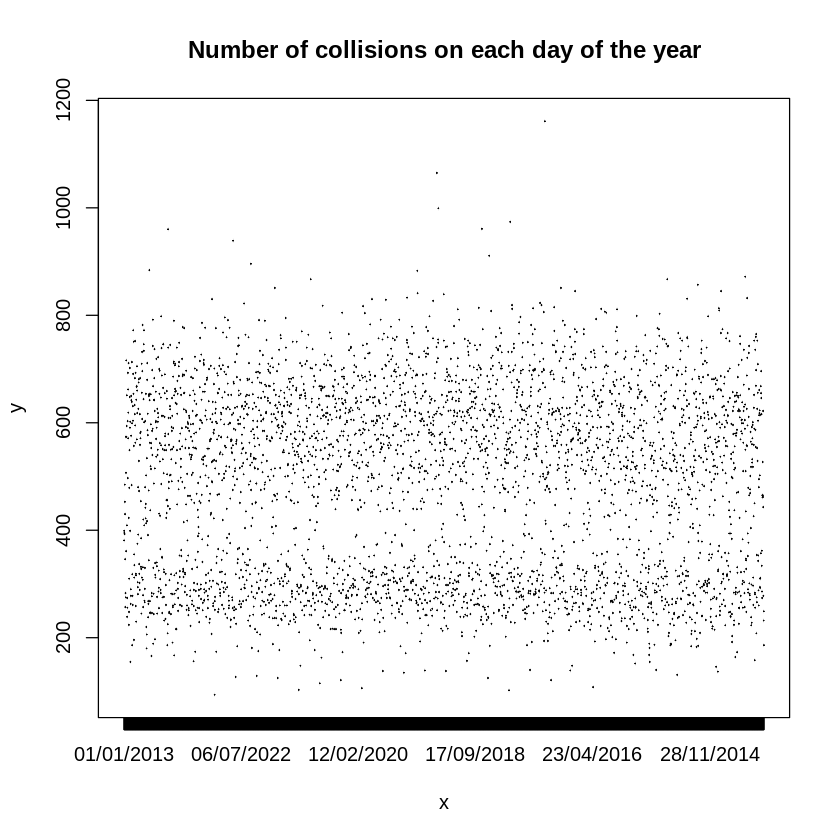

In [ ]:
plot(lst$collision_date, lst$NUM_COLLISIONS, main="Number of collisions on each day of the year")

The above plot shows the number of collisions per day across the total of 11 years. I was expecting to see the data in asending order as per the header data. I'm not sure if data has doubled up to allow for it to be displayed within one plot. Regardless this still allows us to see a clear devision od the data. Lets continue our investigation. Lets begin by splitting our data into years in the next section

#### Splitting the data into
Here we will split the data into years, this will allow us to drill down into specific years or group good corrolation years.

Output:

*   prelist - data from years 2013 to 2019
*   pstlist - data from years 2021 to 2023


  

First we will make a copy of our orignal data import, its important that we do not affect the main list imported to allow us to do a comparision with the oringal data.
For each year we will also add a day index, and day of year. This will allow us to compare each year, and each day for each year. Should provide us some interesting insight and corrolations with the data.

In [ ]:
tcsplittest <- lst

In [ ]:
tc13 <- tcsplittest[which(tcsplittest$year == 2013), ]
dayofyear <- 1*seq_len(nrow(tc13))
dayindex <- 1*seq_len(nrow(tc13))
tc13a <- cbind(dayindex, dayofyear, tc13)

In [ ]:
tc14 <- tcsplittest[which(tcsplittest$year == 2014), ]
dayofyear <- 1*seq_len(nrow(tc14))
dayindex <- 1*seq_len(nrow(tc14)) + nrow(tc13a)
tc14a <- cbind(dayindex, dayofyear, tc14)

In [ ]:
tc15 <- tcsplittest[which(tcsplittest$year == 2015), ]
dayofyear <- 1*seq_len(nrow(tc15))
dayindex <- 1*seq_len(nrow(tc15)) + nrow(tc13a) + nrow(tc14a)
tc15a <- cbind(dayindex, dayofyear, tc15)

In [ ]:
tc16 <- tcsplittest[which(tcsplittest$year == 2016), ]
dayofyear <- 1*seq_len(nrow(tc16))
dayindex <- 1*seq_len(nrow(tc16)) + nrow(tc13a) + nrow(tc14a) + nrow(tc15a)
tc16a <- cbind(dayindex, dayofyear, tc16)

In [ ]:
tc17 <- tcsplittest[which(tcsplittest$year == 2017), ]
dayofyear <- 1*seq_len(nrow(tc17))
dayindex <- 1*seq_len(nrow(tc17)) + nrow(tc13a) + nrow(tc14a) + nrow(tc15a) + nrow(tc16a)
tc17a <- cbind(dayindex, dayofyear, tc17)

In [ ]:
tc18 <- tcsplittest[which(tcsplittest$year == 2018), ]
dayofyear <- 1*seq_len(nrow(tc18))
dayindex <- 1*seq_len(nrow(tc18)) + nrow(tc13a) + nrow(tc14a) + nrow(tc15a) + nrow(tc16a) + nrow(tc17a)
tc18a <- cbind(dayindex, dayofyear, tc18)

In [ ]:
tc19 <- tcsplittest[which(tcsplittest$year == 2019), ]
dayofyear <- 1*seq_len(nrow(tc19))
dayindex <- 1*seq_len(nrow(tc19)) + nrow(tc13a) + nrow(tc14a) + nrow(tc15a) + nrow(tc16a) + nrow(tc17a) + nrow(tc18a)
tc19a <- cbind(dayindex, dayofyear, tc19)

In [ ]:
tc20 <- tcsplittest[which(tcsplittest$year == 2020), ]
dayofyear <- 1*seq_len(nrow(tc20))
dayindex <- 1*seq_len(nrow(tc20)) + nrow(tc13a) + nrow(tc14a) + nrow(tc15a) + nrow(tc16a) + nrow(tc17a) + nrow(tc18a) + nrow(tc19a)
tc20a <- cbind(dayindex, dayofyear, tc20)

In [ ]:
tc21 <- tcsplittest[which(tcsplittest$year == 2021), ]
dayofyear <- 1*seq_len(nrow(tc21))
dayindex <- 1*seq_len(nrow(tc21)) + nrow(tc13a) + nrow(tc14a) + nrow(tc15a) + nrow(tc16a) + nrow(tc17a) + nrow(tc18a) + nrow(tc19a) + nrow(tc20a)
tc21a <- cbind(dayindex, dayofyear, tc21)

In [ ]:
tc22 <- tcsplittest[which(tcsplittest$year == 2022), ]
dayofyear <- 1*seq_len(nrow(tc22))
dayindex <- 1*seq_len(nrow(tc22)) + nrow(tc13a) + nrow(tc14a) + nrow(tc15a) + nrow(tc16a) + nrow(tc17a) + nrow(tc18a) + nrow(tc19a) + nrow(tc20a) + nrow(tc21a)
tc22a <- cbind(dayindex, dayofyear, tc22)

In [ ]:
tc23 <- tcsplittest[which(tcsplittest$year == 2023), ]
dayofyear <- 1*seq_len(nrow(tc23))
dayindex <- 1*seq_len(nrow(tc23))  + nrow(tc13a) + nrow(tc14a) + nrow(tc15a) + nrow(tc16a) + nrow(tc17a) + nrow(tc18a) + nrow(tc19a) + nrow(tc20a) + nrow(tc21a) + nrow(tc22a)
tc23a <- cbind(dayindex, dayofyear, tc23)

In [ ]:
##This Library will allow us to plot the data using some additonal colours. I prefer this to the default plot.
##Added benefit is the method of adding additonal information into the plot.
library(ggplot2)

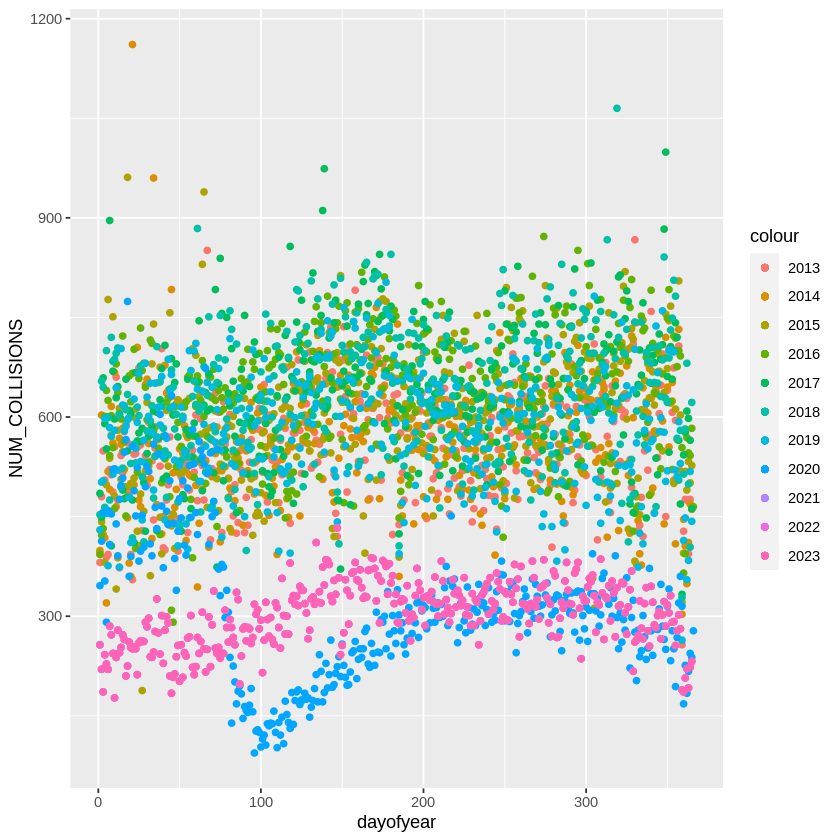

In [ ]:
ggplot() +
  geom_point(data=tc13a, aes(dayofyear, NUM_COLLISIONS, color="2013")) +
  geom_point(data=tc14a, aes(dayofyear, NUM_COLLISIONS, color="2014")) +
  geom_point(data=tc15a, aes(dayofyear, NUM_COLLISIONS, color="2015")) +
  geom_point(data=tc16a, aes(dayofyear, NUM_COLLISIONS, color="2016")) +
  geom_point(data=tc17a, aes(dayofyear, NUM_COLLISIONS, color="2017")) +
  geom_point(data=tc18a, aes(dayofyear, NUM_COLLISIONS, color="2018")) +
  geom_point(data=tc19a, aes(dayofyear, NUM_COLLISIONS, color="2019")) +
  geom_point(data=tc20a, aes(dayofyear, NUM_COLLISIONS, color="2020")) +
  geom_point(data=tc21a, aes(dayofyear, NUM_COLLISIONS, color="2021")) +
  geom_point(data=tc21a, aes(dayofyear, NUM_COLLISIONS, color="2022")) +
  geom_point(data=tc21a, aes(dayofyear, NUM_COLLISIONS, color="2023"))

Once all the years have been plotted, year can see that there is a shift of data, however its not to clear from the above data because of the vast amount of data. The blue for 2020 looks odd, lets group pre and post 2020 into thier own colours and check out how it looks.

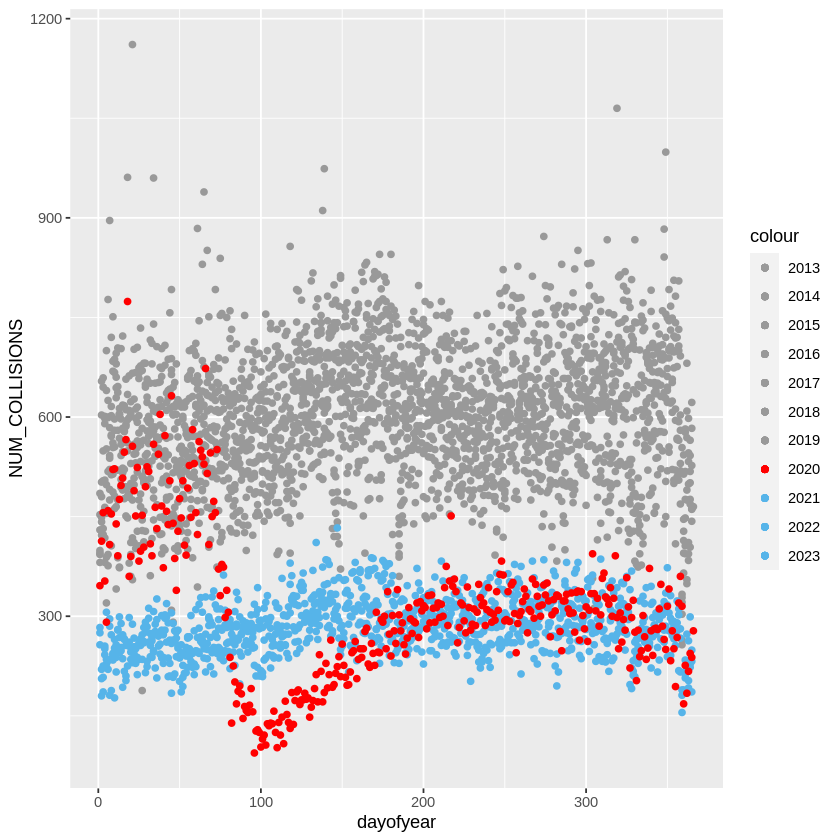

In [ ]:
ggplot() +
  geom_point(data=tc13a, aes(dayofyear, NUM_COLLISIONS, color="2013")) +
  geom_point(data=tc14a, aes(dayofyear, NUM_COLLISIONS, color="2014")) +
  geom_point(data=tc15a, aes(dayofyear, NUM_COLLISIONS, color="2015")) +
  geom_point(data=tc16a, aes(dayofyear, NUM_COLLISIONS, color="2016")) +
  geom_point(data=tc17a, aes(dayofyear, NUM_COLLISIONS, color="2017")) +
  geom_point(data=tc18a, aes(dayofyear, NUM_COLLISIONS, color="2018")) +
  geom_point(data=tc19a, aes(dayofyear, NUM_COLLISIONS, color="2019")) +
  geom_point(data=tc21a, aes(dayofyear, NUM_COLLISIONS, color="2021")) +
  geom_point(data=tc22a, aes(dayofyear, NUM_COLLISIONS, color="2022")) +
  geom_point(data=tc23a, aes(dayofyear, NUM_COLLISIONS, color="2023")) +
  geom_point(data=tc20a, aes(dayofyear, NUM_COLLISIONS, color="2020")) +
  scale_color_manual(values=c("#999999","#999999","#999999","#999999","#999999","#999999","#999999", "#FF0000", "#56B4E9","#56B4E9","#56B4E9"))

Here we can clearly see that the year of 2020 has a vary strange behavour. Once we look into what could cause this event, we come across COVID lockdown which kicked in on 23/03/2020. This gives us the massive drop in number of collisions and a gradual increase as locked down is eased. We can also see from the future years that the collisions never return to the previous years levels. This is also becasue of COVID which changed the way that the moden day workforce works. Alot of buisness allowed working from home policies which reduced the number of cars on the road.
Now that we have discovered this, lets remove the year 2020 from the dataset. We will also splot the data into pre and post covid. Since the behavour of the workforce changed, we can do a comparison of pre and post then make a decisions on if we want to use the data to train a model.

In [ ]:
prelst <- rbind(tc13a, tc14a, tc15a, tc16a, tc17a, tc18a, tc19a)

In [ ]:
pstlst <- rbind(tc21a, tc22a, tc23a )

Lets test out the code to make sure our data sets are as expected;

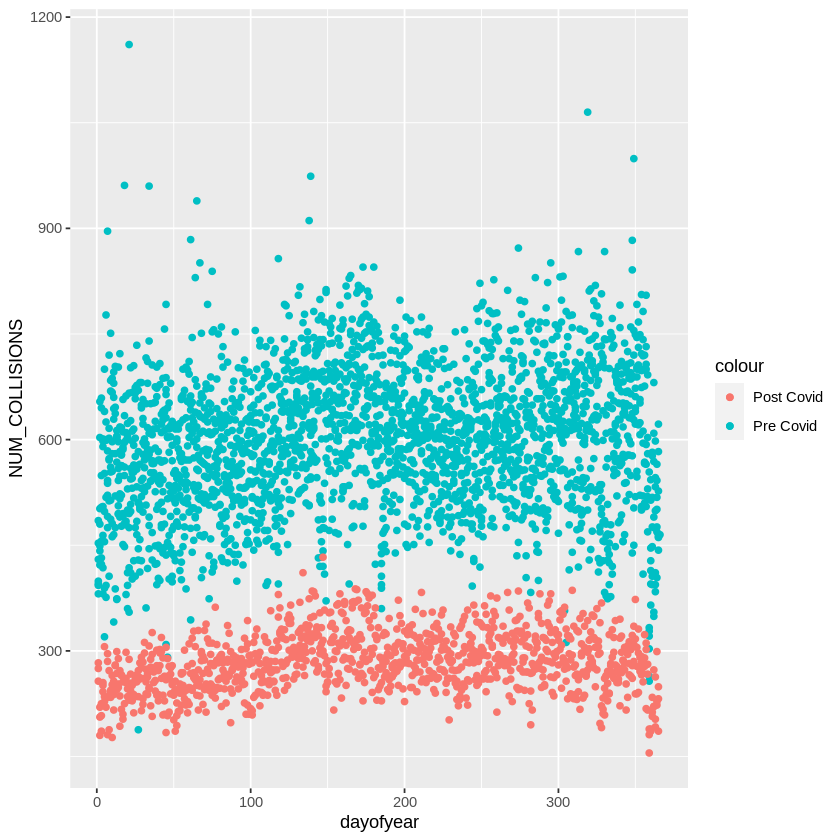

In [ ]:
ggplot() +
  geom_point(data=prelst, aes(dayofyear, NUM_COLLISIONS, color="Pre Covid")) +
  geom_point(data=pstlst, aes(dayofyear, NUM_COLLISIONS, color="Post Covid"))

our data is now looking alot better, however there is still room for improvement as there is a few out laying bits of data.

### Data Corrolation Matrix
This section will take a quick high level view of corrolation of the different columns after we have completed the data split. We will review a before, pre and post world corrolation matrix and how this could affect the results.

Lets do a corrolation matrix to help idenitfy any headers which could be worth investigating further. We will do a comparisions of pre filtered data, pre covid and post covid data. Here we will highlight the the importance of adjusting your data set sample.

In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(corrplot)

corrplot 0.92 loaded



In [ ]:
defcorlst <- cor(as.matrix(lst[, unlist(lapply(lst, is.numeric))]))

Warning message in cor(as.matrix(lst[, unlist(lapply(lst, is.numeric))])):
“the standard deviation is zero”


In [ ]:
precorlst <- cor(as.matrix(prelst[, unlist(lapply(prelst, is.numeric))]))

Warning message in cor(as.matrix(prelst[, unlist(lapply(prelst, is.numeric))])):
“the standard deviation is zero”


In [ ]:
pstcorlst <- cor(as.matrix(pstlst[, unlist(lapply(pstlst, is.numeric))]))

Warning message in cor(as.matrix(pstlst[, unlist(lapply(pstlst, is.numeric))])):
“the standard deviation is zero”


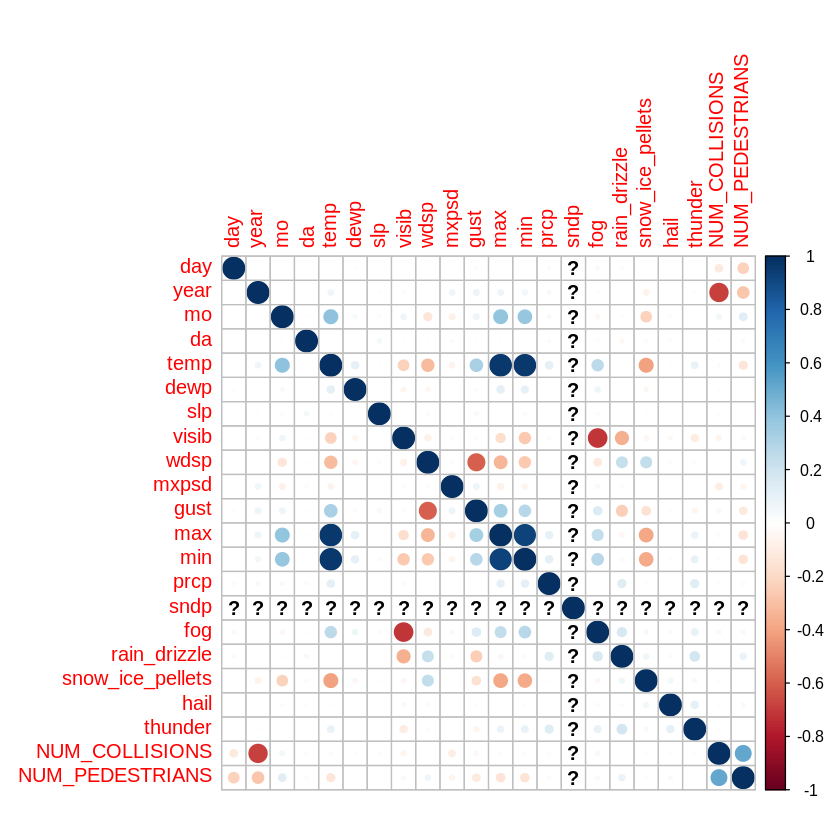

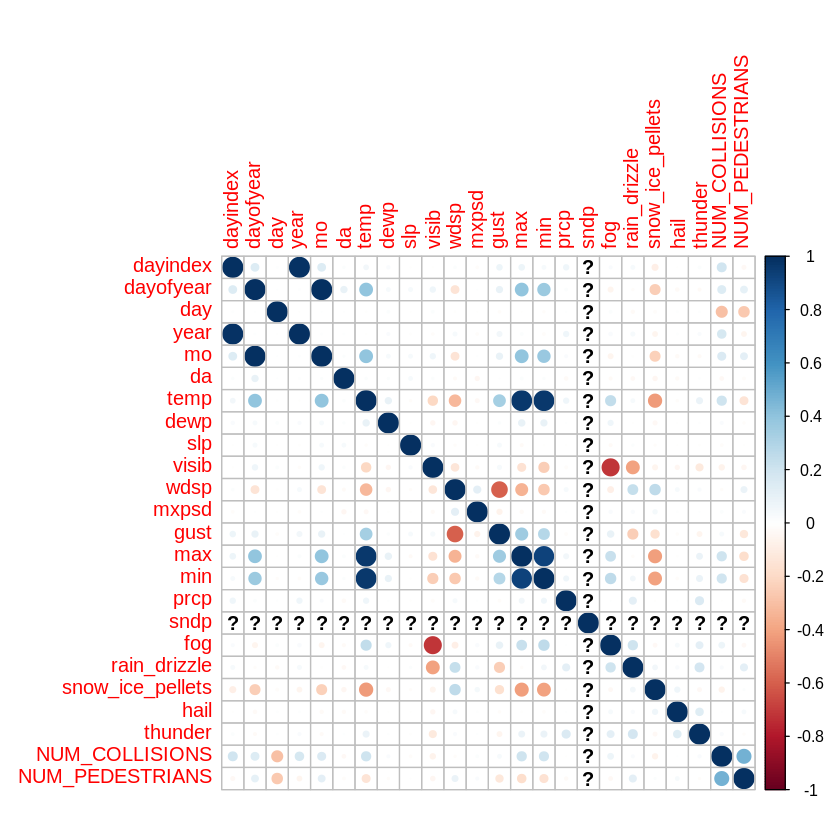

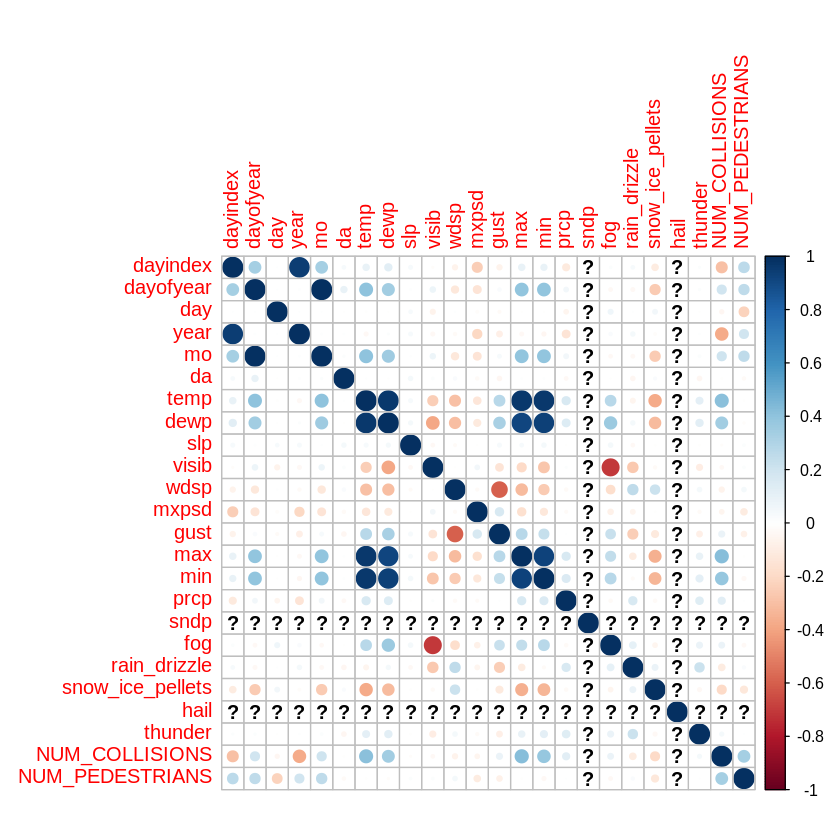

In [ ]:
corrplot(defcorlst, method = "circle")
corrplot(precorlst, method = "circle")
corrplot(pstcorlst, method = "circle")


So the above matrices allow for us to quickly idenitfy any headers that might have some corrolation between each other. As we can see from the first one - we have some corrolation however when we specifically look at NUM_COllisions we have pretty weak corrolations. Or major one is the year.

When looking at pre covid corrolation matric we can see we have a better corrolation betwen the individal headers.

Post covid also shows similar corrolations as pre covid, although these seems to be a stronger corrolation, this is likely due to the lower number of collisions, and smaller data sample.

From pre and post covid we will investigate the corrolation between, temp, dewp, max and min. this should provide us with some good data to create our linear model.

### Corrolation Between Temp and Collisions Investigation
From our corrolation matrix we have identified a corrolation between temp and number of collisions. We will investigate it further in this section.

Outputs:

*   clnprelst - Cleaned pre covid data set (Removed outlaying datapoints)
*   clnpstlst - Cleaned post covid data set (removed outlaying datapoints)



Lets start by just plotting the temp vs number of collisions for both pre and post covid.

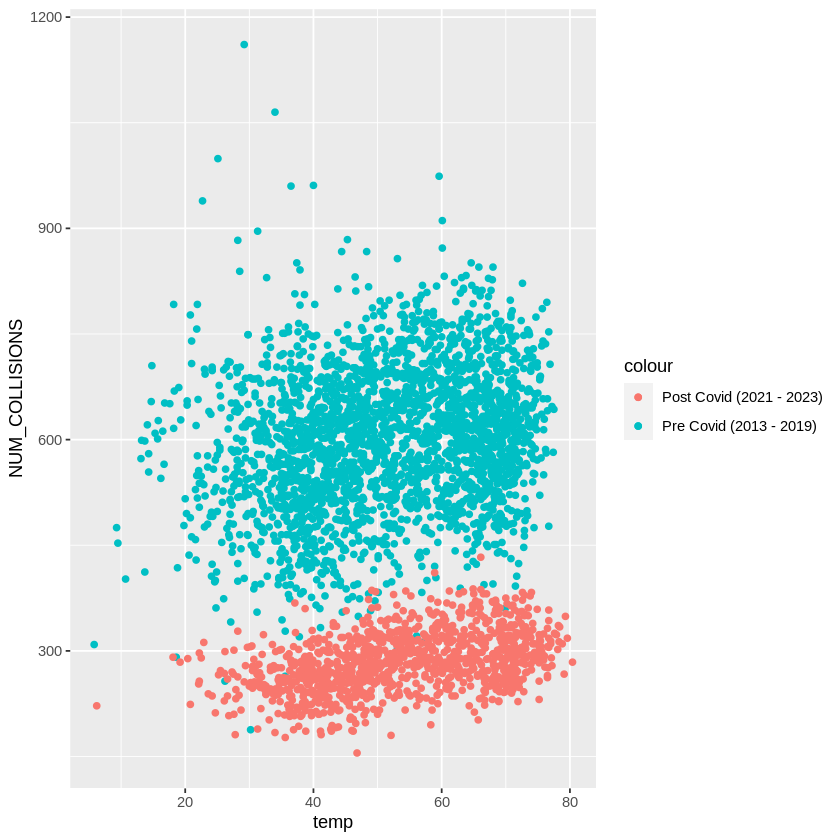

In [ ]:
ggplot() +
  geom_point(data=prelst, aes(temp, NUM_COLLISIONS, color="Pre Covid (2013 - 2019)")) +
  geom_point(data=pstlst, aes(temp, NUM_COLLISIONS, color="Post Covid (2021 - 2023)"))

This gives us a good picture of the data. We can quickly see that the pre covid is alot more scattered whereas pst covid is more compact. As stated before this is likely due to the total number of trips taken being higher pre-covid.

There is a good few outlaying bits of data for pre covid. To give us this most accurate data for our linear model lets focus on one data set at a time and see if we can remove the out laying bits of data to give us a stronger corrolation. lets start of with the baseline corrolation.

In [ ]:
cor(lst$temp, lst$NUM_COLLISIONS, method = "pearson")

[1] 0.0203021

In [ ]:
cor(prelst$temp, prelst$NUM_COLLISIONS, method = "pearson")

[1] 0.2030498

In [ ]:
cor(pstlst$temp, pstlst$NUM_COLLISIONS, method = "pearson")

[1] 0.4131907

The above is the base line corrolation calculation results. I have completed this with the orignal data list as well to show how we have improved the corrolation between temp and number of collisions.

I am calculating the corrolation using the pearson method as this a measure of a linear association between the data points. This is vitial for our linear model we will build later.


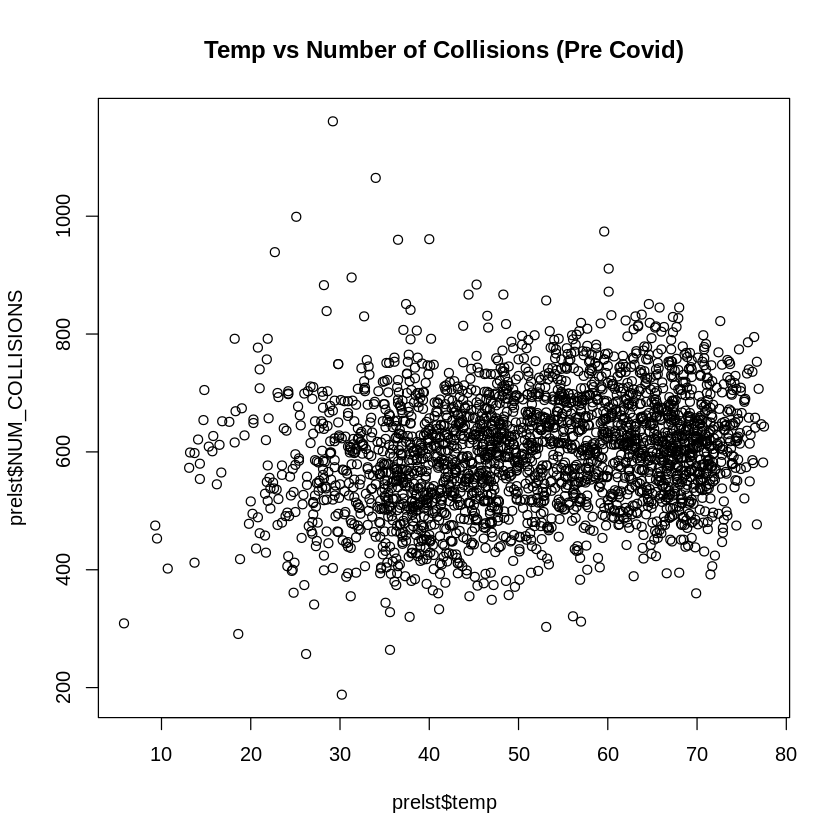

In [ ]:
plot(prelst$temp, prelst$NUM_COLLISIONS, main = "Temp vs Number of Collisions (Pre Covid)")

From the pre covid data we need to remove the outlaying bits of data. So lets set a limit points for the data and replot the data.

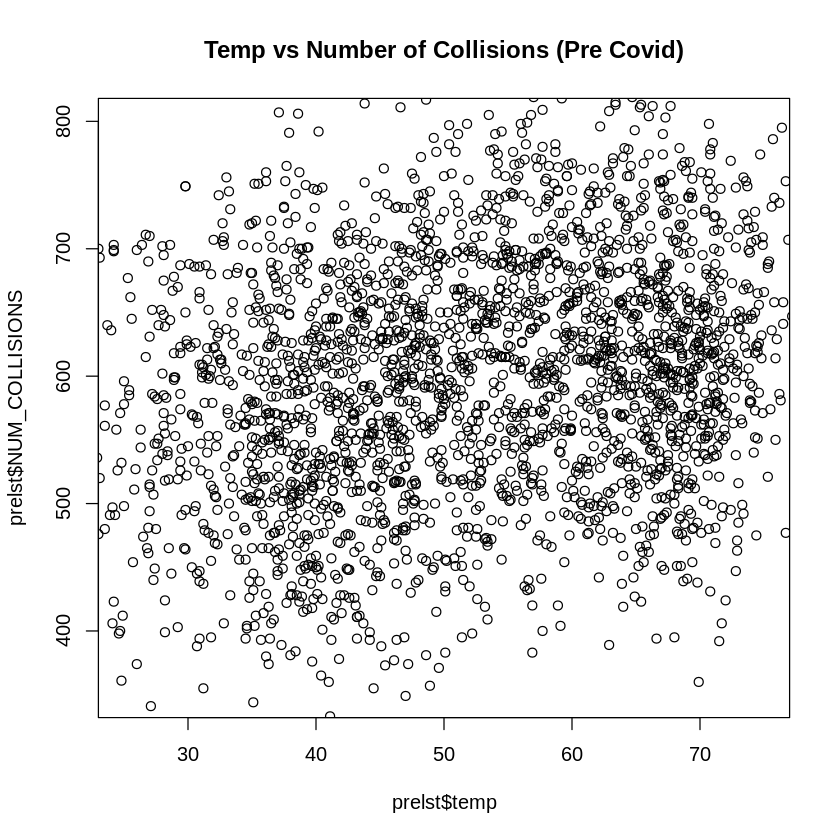

In [ ]:
plot(prelst$temp, prelst$NUM_COLLISIONS, main = "Temp vs Number of Collisions (Pre Covid)", xlim = c(25,75), ylim=c(350,800))

Using the default plotter I managed to remove majority of the out laying data to give us a good cluster of data points, we can see from the density of the data points that there is a clear increase in collisions the higher the temp. I would be happy to assume that this is due to more people traveling during the warmer weather, this could be the summer season.

Lets put a corrolation line through the data points.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 167 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 167 rows containing missing values (`geom_point()`).”


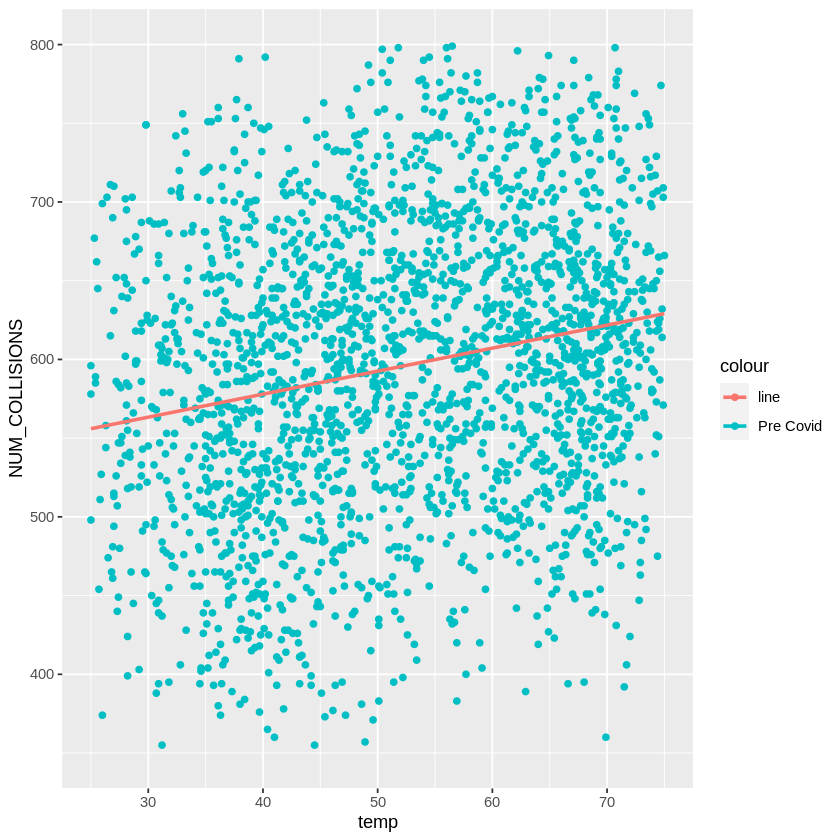

In [ ]:
ggplot() +
  geom_point(data=prelst, aes(temp, NUM_COLLISIONS, color="Pre Covid")) +
  xlim(25,75) +
  ylim(350,800) +
  geom_smooth(method = "lm", se = FALSE, data=prelst, aes(temp, NUM_COLLISIONS,  color="line"))

We have now cut off majority of the out laying datapoints out. This data sample looks good, lets put this into a dataset that we an use later.

In [ ]:
clnprelst <- prelst[which((prelst$temp >= 25) & (prelst$temp <= 75) & (prelst$NUM_COLLISIONS >= 350) & (prelst$NUM_COLLISIONS <= 800) ), ]

Lets check that the data is stored correctly and replot the data.

`geom_smooth()` using formula = 'y ~ x'


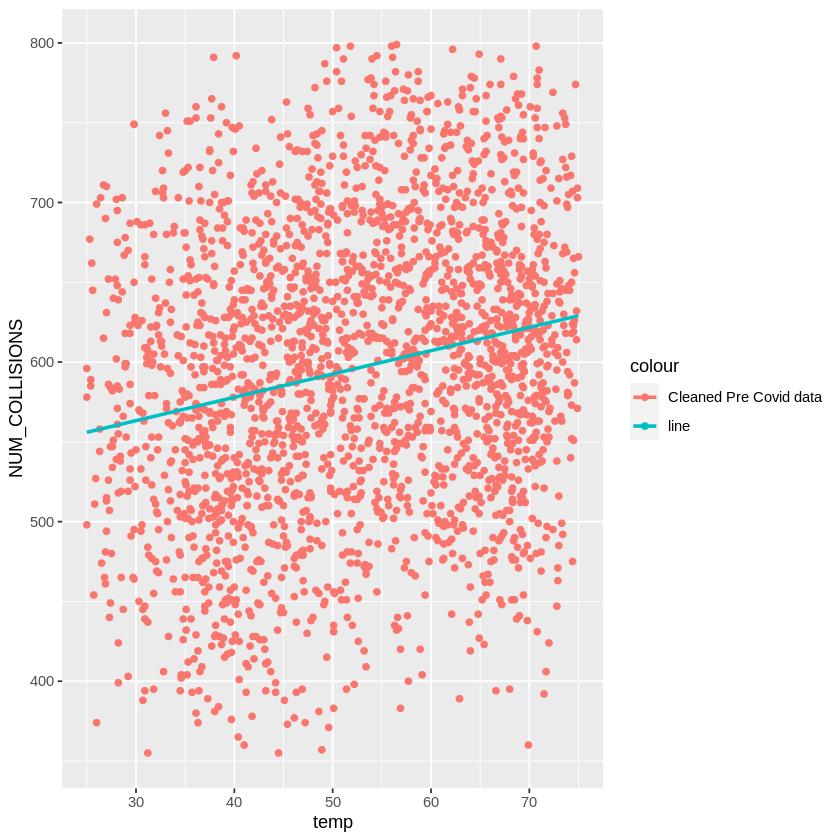

In [ ]:
ggplot() +
  geom_point(data=clnprelst, aes(temp, NUM_COLLISIONS, color="Cleaned Pre Covid data")) +
  geom_smooth(method = "lm", se = FALSE, data=clnprelst, aes(temp, NUM_COLLISIONS,  color="line"))

We have now stored our filtered data into clnprelst, we will use this dataset to train the linear model. lets do the same with post covid.

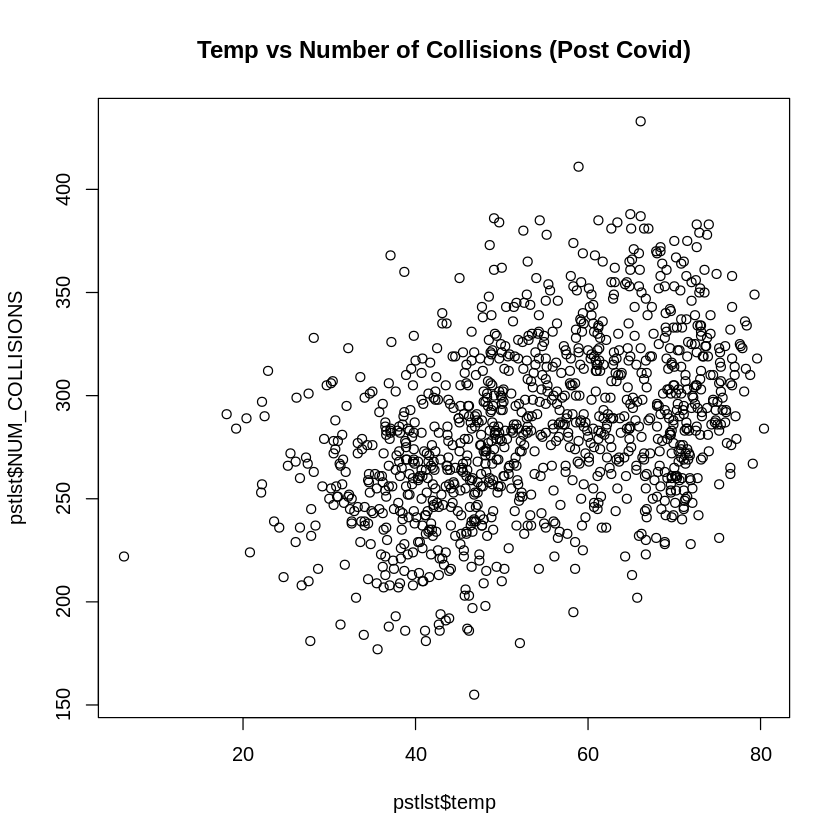

In [ ]:
plot(pstlst$temp, pstlst$NUM_COLLISIONS, main = "Temp vs Number of Collisions (Post Covid)")

Lets do the same as before and remove the outlaying data points

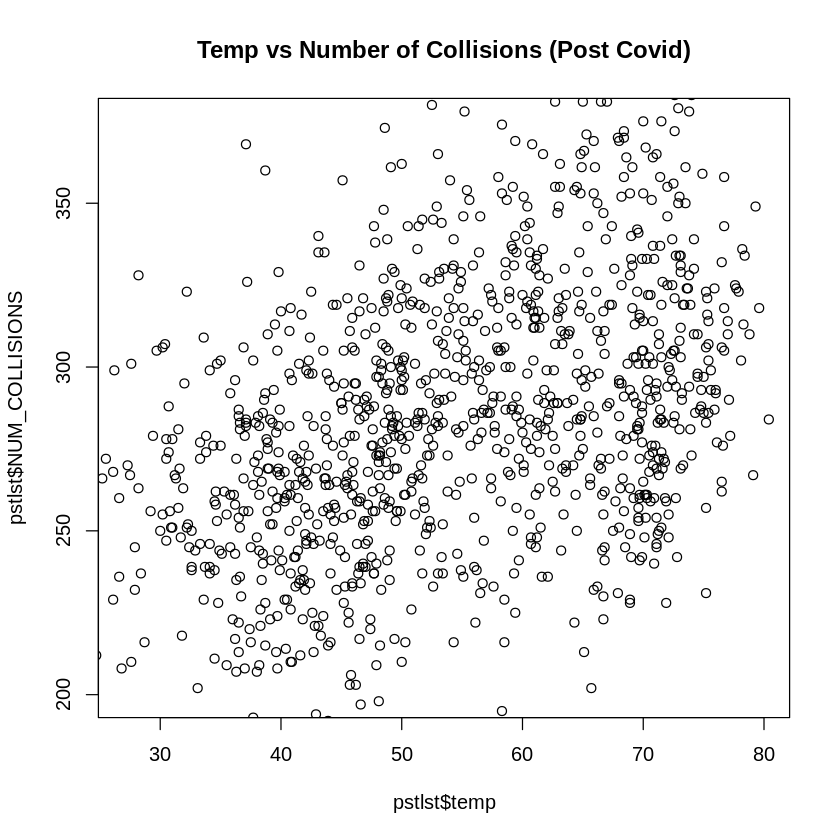

In [ ]:
plot(pstlst$temp, pstlst$NUM_COLLISIONS, main = "Temp vs Number of Collisions (Post Covid)", xlim=c(27,80), ylim = c(200,375))

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 62 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 62 rows containing missing values (`geom_point()`).”


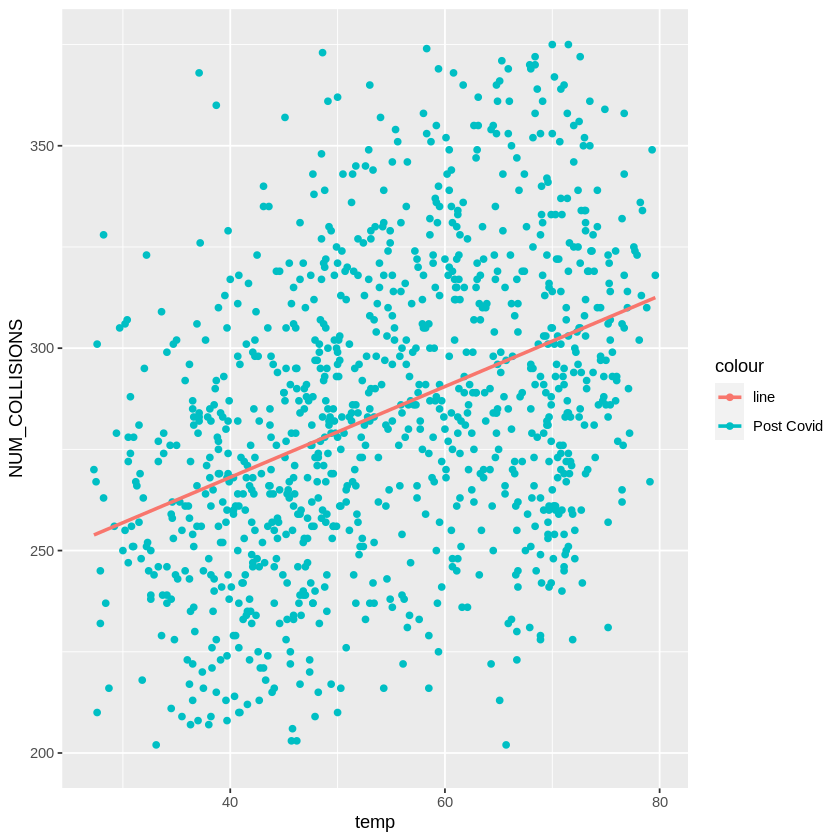

In [ ]:
ggplot() +
  geom_point(data=pstlst, aes(temp, NUM_COLLISIONS, color="Post Covid")) +
  xlim(27,80) +
  ylim(200,375) +
  geom_smooth(method = "lm", se = FALSE, data=pstlst, aes(temp, NUM_COLLISIONS,  color="line"))

In [ ]:
clnpstlst <- pstlst[which((pstlst$temp >= 27) & (pstlst$temp <= 80) & (pstlst$NUM_COLLISIONS >= 200) & (pstlst$NUM_COLLISIONS <= 375) ), ]

`geom_smooth()` using formula = 'y ~ x'


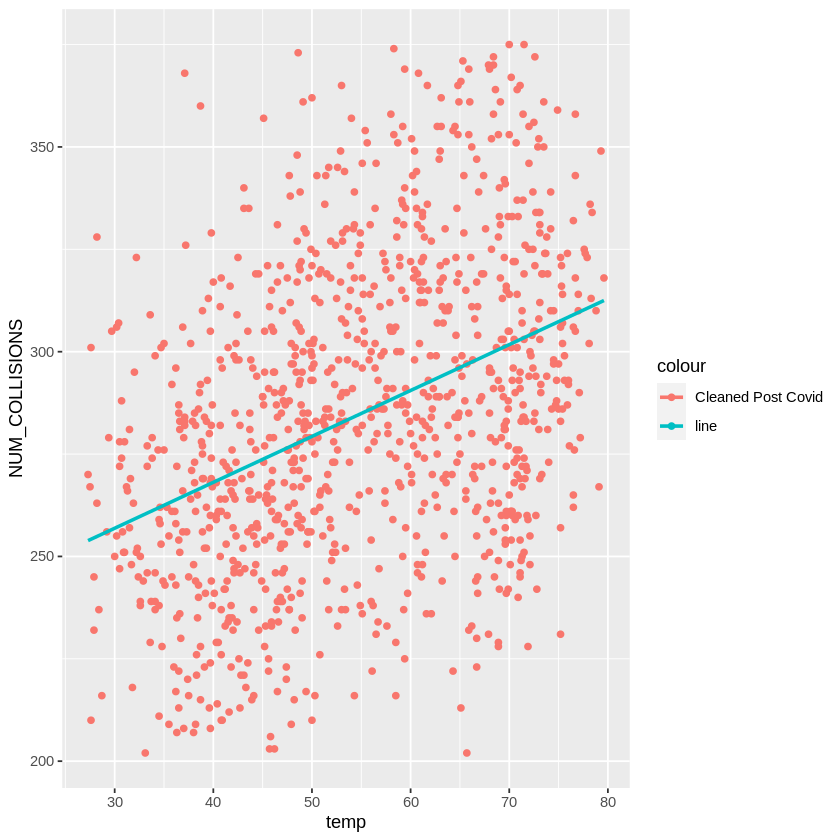

In [ ]:
ggplot() +
  geom_point(data=clnpstlst, aes(temp, NUM_COLLISIONS, color="Cleaned Post Covid")) +
  geom_smooth(method = "lm", se = FALSE, data=clnpstlst, aes(temp, NUM_COLLISIONS,  color="line"))


Lets now check the corrolation between the oringal , the split and the cleaned data set.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


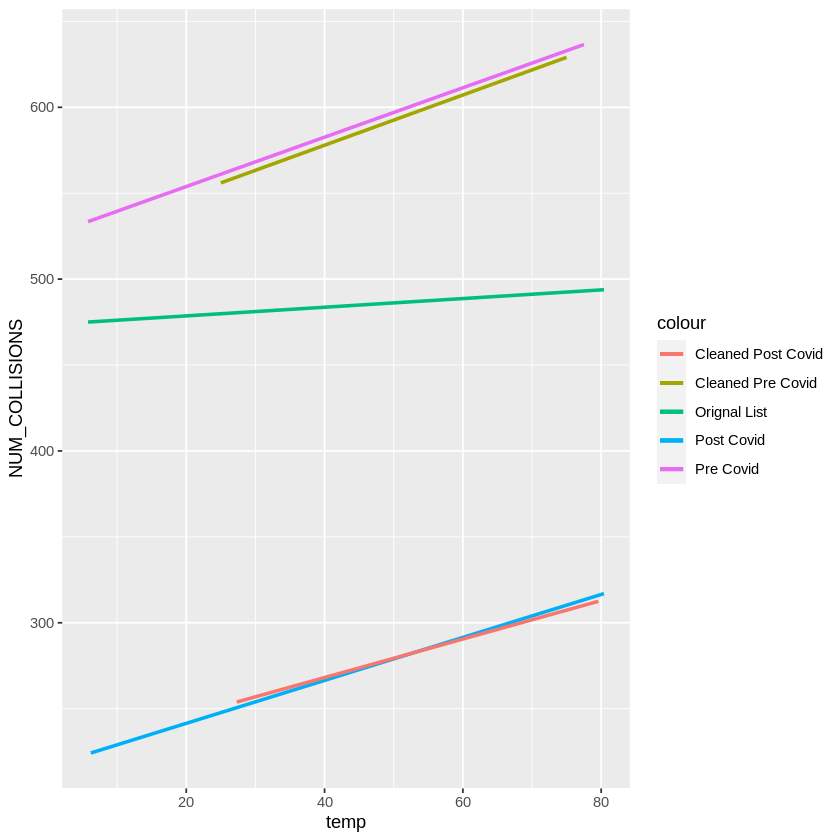

In [ ]:
ggplot() +
  geom_smooth(method = "lm", se = FALSE, data=lst, aes(temp, NUM_COLLISIONS,  color="Orignal List")) +
  geom_smooth(method = "lm", se = FALSE, data=prelst, aes(temp, NUM_COLLISIONS,  color="Pre Covid")) +
  geom_smooth(method = "lm", se = FALSE, data=pstlst, aes(temp, NUM_COLLISIONS,  color="Post Covid")) +
  geom_smooth(method = "lm", se = FALSE, data=clnprelst, aes(temp, NUM_COLLISIONS,  color="Cleaned Pre Covid")) +
  geom_smooth(method = "lm", se = FALSE, data=clnpstlst, aes(temp, NUM_COLLISIONS,  color="Cleaned Post Covid"))


Although from the graph it doesnt look like much, even the minor adjustments could help with the linear regression modeling. With the cleaned

In [ ]:
summary(lm(prelst$NUM_COLLISIONS ~ prelst$temp))


Call:
lm(formula = prelst$NUM_COLLISIONS ~ prelst$temp)

Residuals:
    Min      1Q  Median      3Q     Max 
-380.52  -66.45   -0.49   65.15  593.91 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 525.1146     7.3241   71.70   <2e-16 ***
prelst$temp   1.4374     0.1372   10.48   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 98.19 on 2554 degrees of freedom
Multiple R-squared:  0.04123,	Adjusted R-squared:  0.04085 
F-statistic: 109.8 on 1 and 2554 DF,  p-value: < 2.2e-16


In [ ]:
summary(lm(clnprelst$NUM_COLLISIONS ~ clnprelst$temp))


Call:
lm(formula = clnprelst$NUM_COLLISIONS ~ clnprelst$temp)

Residuals:
     Min       1Q   Median       3Q      Max 
-261.619  -63.250    1.788   63.840  216.143 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    519.4737     7.5521   68.78   <2e-16 ***
clnprelst$temp   1.4613     0.1401   10.43   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 88.84 on 2387 degrees of freedom
Multiple R-squared:  0.0436,	Adjusted R-squared:  0.0432 
F-statistic: 108.8 on 1 and 2387 DF,  p-value: < 2.2e-16


In [ ]:
summary(lm(pstlst$NUM_COLLISIONS ~ pstlst$temp))


Call:
lm(formula = pstlst$NUM_COLLISIONS ~ pstlst$temp)

Residuals:
     Min       1Q   Median       3Q      Max 
-119.963  -24.342   -1.596   23.727  133.905 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 216.44828    4.64620   46.59   <2e-16 ***
pstlst$temp   1.25032    0.08335   15.00   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37.73 on 1093 degrees of freedom
Multiple R-squared:  0.1707,	Adjusted R-squared:   0.17 
F-statistic:   225 on 1 and 1093 DF,  p-value: < 2.2e-16


In [ ]:
summary(lm(clnpstlst$NUM_COLLISIONS ~ clnpstlst$temp))


Call:
lm(formula = clnpstlst$NUM_COLLISIONS ~ clnpstlst$temp)

Residuals:
    Min      1Q  Median      3Q     Max 
-94.913 -23.420  -1.563  22.984 103.149 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    223.25994    4.60499   48.48   <2e-16 ***
clnpstlst$temp   1.12105    0.08185   13.70   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 34.36 on 1031 degrees of freedom
Multiple R-squared:  0.154,	Adjusted R-squared:  0.1531 
F-statistic: 187.6 on 1 and 1031 DF,  p-value: < 2.2e-16


### Corrolation Between Wind and Number of Collisions
Here we investigate the corrolation between max windspeed and min windspeed against number of collisions. We will also look at the corrolation between the two columns, athen decide which ones has the better fit.

Outputs:

*   dewpclnprelst - Cleaned pre covid list for dew point vs collisions
*   dewpclnpstlst - cleaned post codiv list for dew point vs collisions



Lets plot the data for pre and post covid so we can do a comparision.

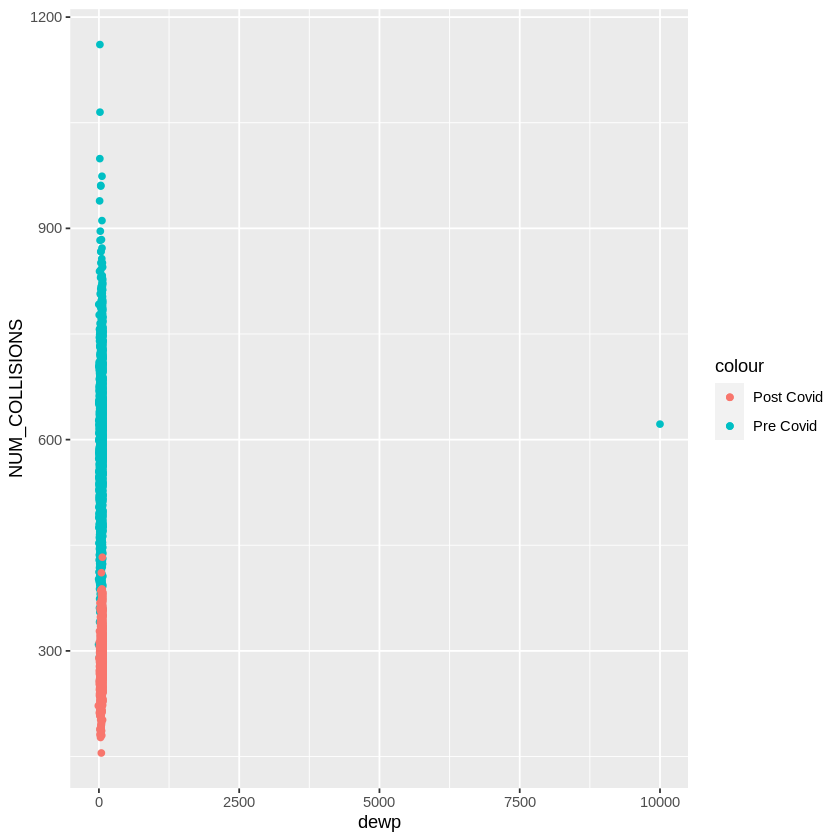

In [ ]:
ggplot() +
  geom_point(data=prelst, aes(dewp, NUM_COLLISIONS, color="Pre Covid")) +
  geom_point(data=pstlst, aes(dewp, NUM_COLLISIONS, color="Post Covid"))

So as we can see we have an outlaying data sample, lets get rid of this and have another look at the data.

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


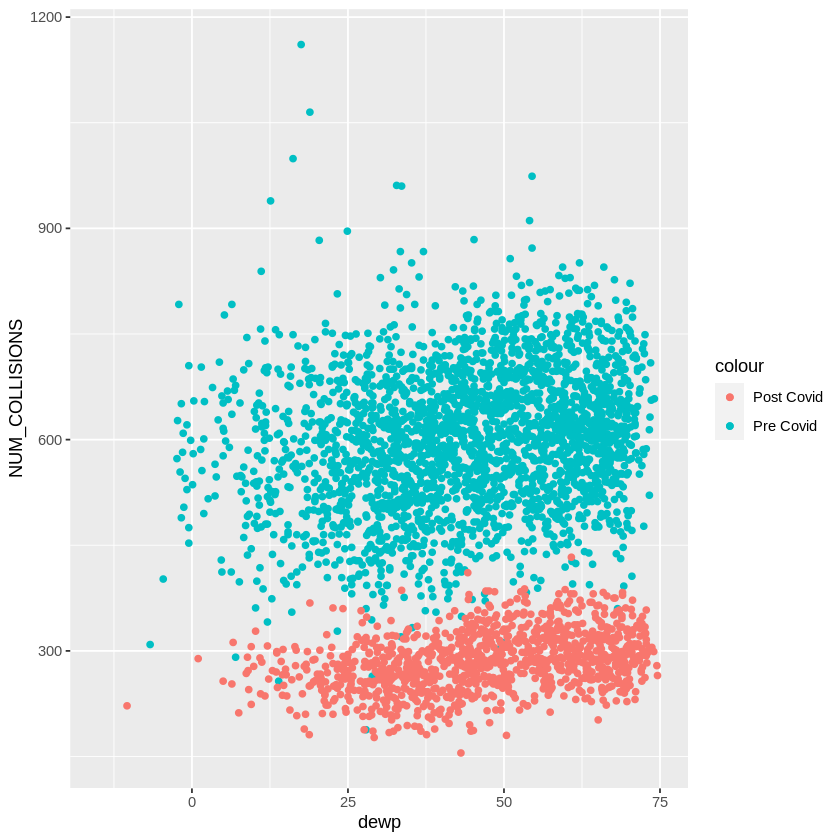

In [ ]:
ggplot() +
  geom_point(data=prelst, aes(dewp, NUM_COLLISIONS, color="Pre Covid")) +
  geom_point(data=pstlst, aes(dewp, NUM_COLLISIONS, color="Post Covid")) +
    xlim(-15, 75)

Just as we seen from the corrolation matrix we did near the start, this the corrolation between dewp and number of collisions is looking Good, lets continue by looking at the data separately and clean the data.  

#### Pre Covid - Data Analysis and Cleaning
In this section we will specificly be looking at the pre covid data for dew point and removing any outlying datapoint. We will also calculate the corrolation before and after data cleansing.

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


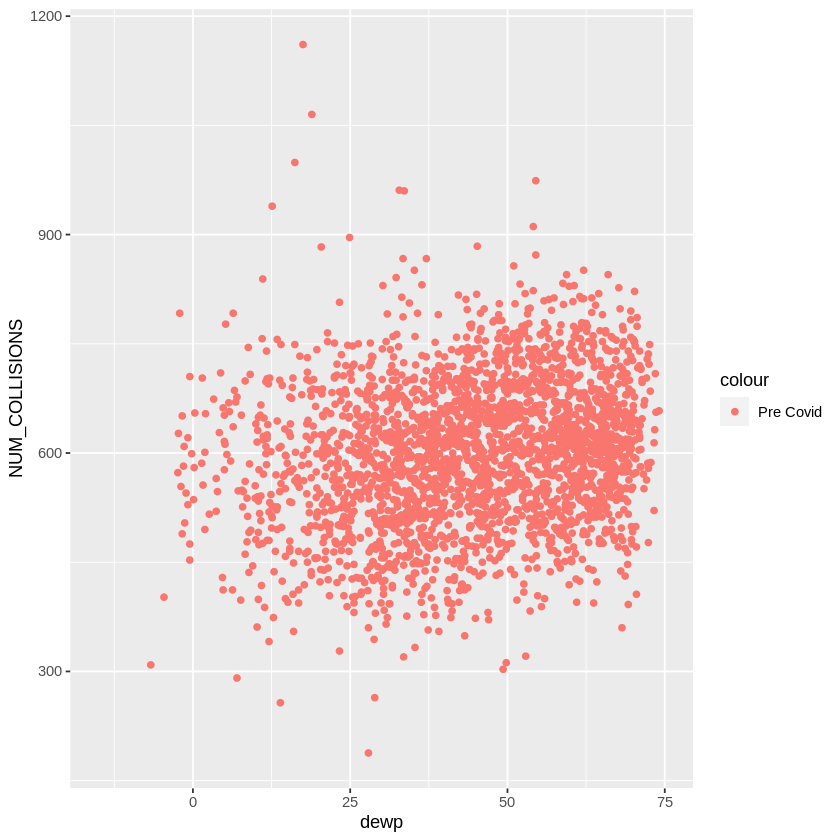

In [ ]:
ggplot() +
  geom_point(data=prelst, aes(dewp, NUM_COLLISIONS, color="Pre Covid")) +
  xlim(-15, 75)

In [ ]:
cor(prelst$dewp, prelst$NUM_COLLISIONS, method = "pearson")

[1] 0.02142623

So this inital value doesnt show much of a corrolation between the two, however we do have a good chunk of out laying data for the pre covid. We also have alot more data here as well which might hinder us for the dew point. Lets continue and remove the outlaying data points.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 143 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 143 rows containing missing values (`geom_point()`).”


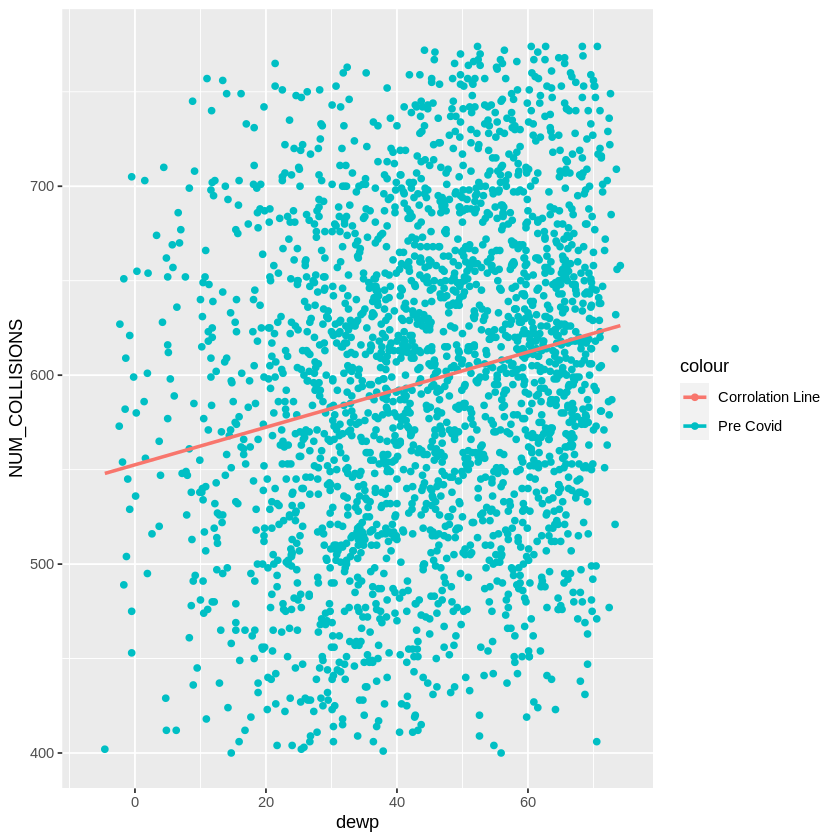

In [ ]:
ggplot() +
  geom_point(data=prelst, aes(dewp, NUM_COLLISIONS, color="Pre Covid")) +
  xlim(-7, 75) +
  ylim(400,775) +
  geom_smooth(method = "lm", se = FALSE, data=prelst, aes(dewp, NUM_COLLISIONS,  color="Corrolation Line"))

This is looking good, lets put it into a data set for later.

In [ ]:
dewpclnprelst <- prelst[which((prelst$dewp >= -7) & (prelst$dewp <= 75) & (prelst$NUM_COLLISIONS >= 400) & (prelst$NUM_COLLISIONS <= 775) ), ]

`geom_smooth()` using formula = 'y ~ x'


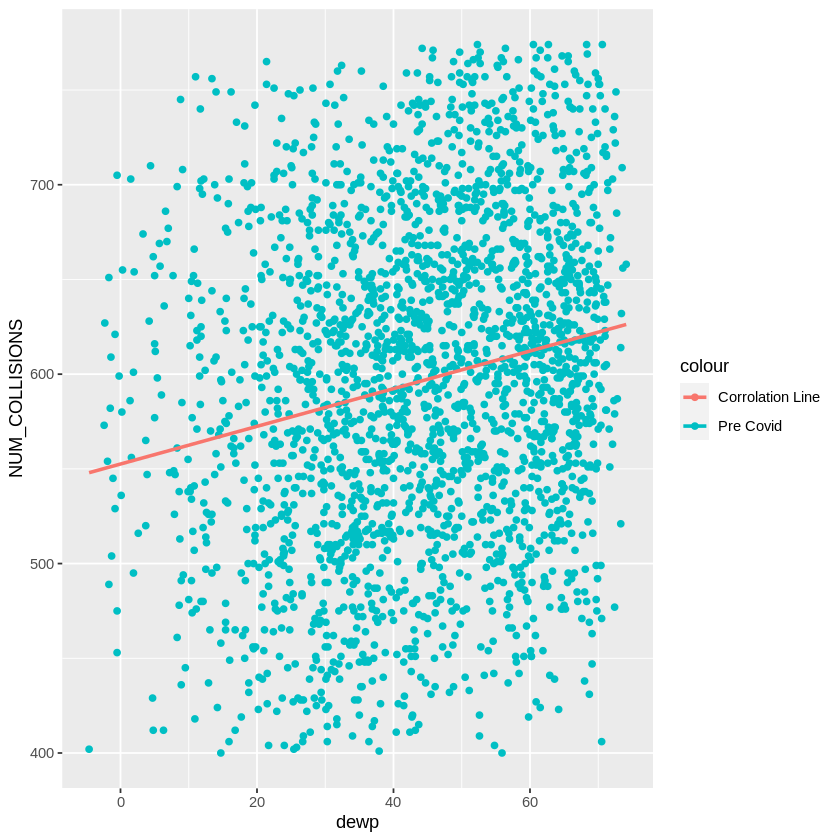

In [ ]:
ggplot() +
  geom_point(data=dewpclnprelst, aes(dewp, NUM_COLLISIONS, color="Pre Covid")) +
  geom_smooth(method = "lm", se = FALSE, data=dewpclnprelst, aes(dewp, NUM_COLLISIONS,  color="Corrolation Line"))

Looks good! Lets do the corrolation

In [ ]:
cor(dewpclnprelst$dewp, dewpclnprelst$NUM_COLLISIONS, method = "pearson")

[1] 0.1972341

We have massivly improved the corrolation value by just removing the out laying data. I think we could further improve this value by reducing the number of years. This is becasue if we reivew the data we had before when we plotted it vs the data, we can see over time that the number of collusions over time increase, we could normilise this data by the increase in value of each year then do a model with the assumption that the number of collisions will increase by x number per year. This would allow us to have a higher corrolation value and overall a more accurate model. That being said we will still use this data to create a model later on.

#### Post Covid Dew Point - Data Analysis and Data Cleaning
In this section we will be looking at post covid data for dew point vs number of collisions.



In [ ]:
cor(pstlst$dewp, pstlst$NUM_COLLISIONS, method = "pearson")

[1] 0.341628

Already we have a strong corrolation, let get the data plotted and review if the data needs to be cleaned.

`geom_smooth()` using formula = 'y ~ x'


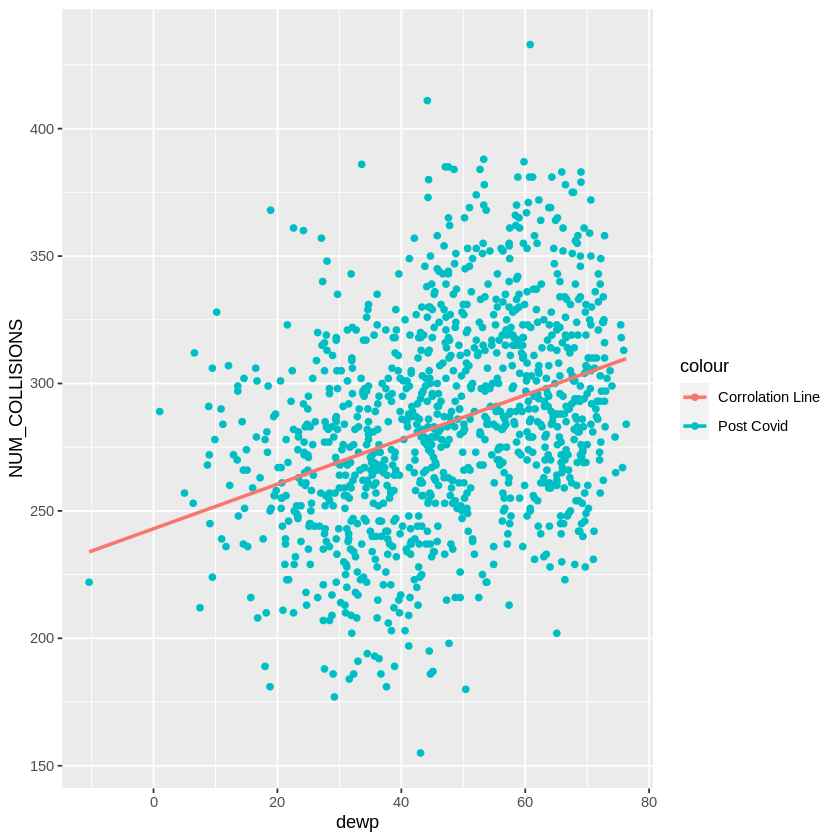

In [ ]:
ggplot() +
  geom_point(data=pstlst, aes(dewp, NUM_COLLISIONS, color="Post Covid")) +
  geom_smooth(method = "lm", se = FALSE, data=pstlst, aes(dewp, NUM_COLLISIONS,  color="Corrolation Line"))

As you can see we still have some out laying bits of data, lets remove these and check the corrolation.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 24 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 24 rows containing missing values (`geom_point()`).”


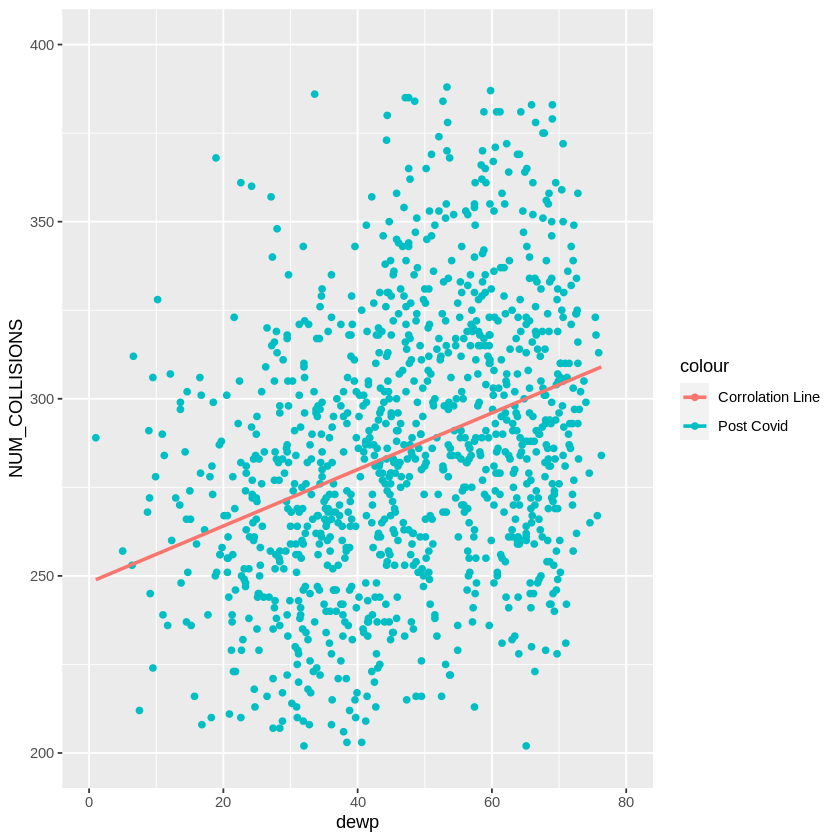

In [ ]:
ggplot() +
  geom_point(data=pstlst, aes(dewp, NUM_COLLISIONS, color="Post Covid")) +
  geom_smooth(method = "lm", se = FALSE, data=pstlst, aes(dewp, NUM_COLLISIONS,  color="Corrolation Line")) +
  xlim(0,80) +
  ylim(200,400)

In [ ]:
dewpclnpstlst <- pstlst[which((pstlst$dewp >= 0) & (pstlst$dewp <= 80) & (pstlst$NUM_COLLISIONS >= 200) & (pstlst$NUM_COLLISIONS <= 400) ), ]

`geom_smooth()` using formula = 'y ~ x'


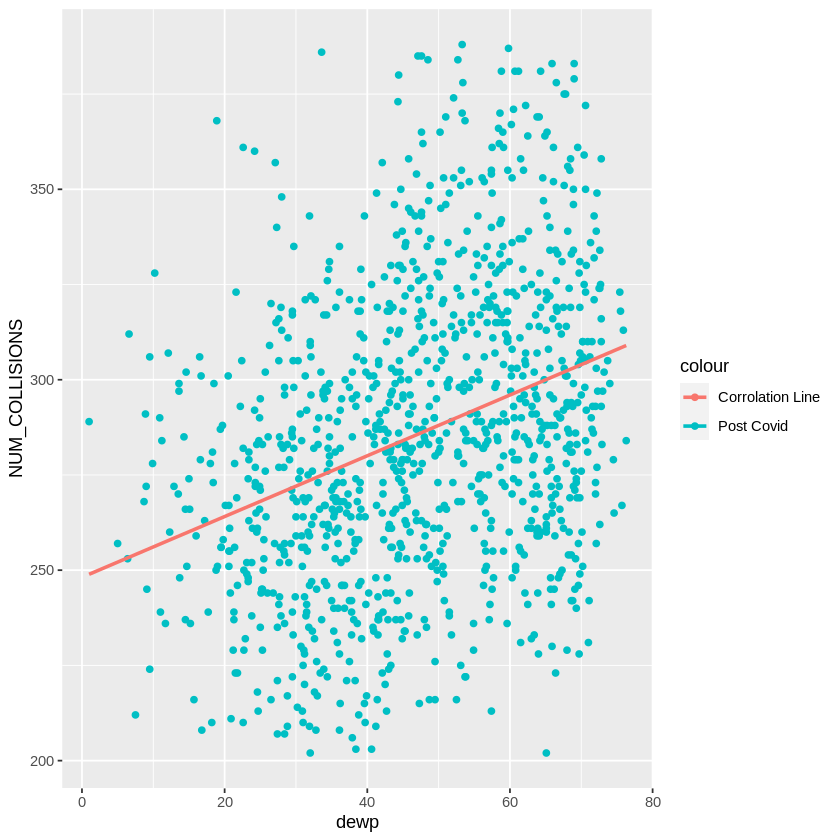

In [ ]:
ggplot() +
  geom_point(data=dewpclnpstlst, aes(dewp, NUM_COLLISIONS, color="Post Covid")) +
  geom_smooth(method = "lm", se = FALSE, data=dewpclnpstlst, aes(dewp, NUM_COLLISIONS,  color="Corrolation Line"))

Looks good, lets check the corrolation value to see if its changed.

In [ ]:
cor(dewpclnpstlst$dewp, dewpclnpstlst$NUM_COLLISIONS, method = "pearson")

[1] 0.3298407

So in this instance the corrolation value has descreased, which is a good thing as it will give is a more accurate linear model later on. Interestly enough we the dew point limits had changed from pre and post covid. This could be due to global warming... We will use this data later on for the linear model.

### Number of Pedestrian Involved with Collisions
In this section we will investigate the corrolation between the number of pedestrians involved in a collision




Lets re plot the corrolation matrix with a reduced column section to see if we can identify any columns we should investigate further.

In [ ]:
library(lattice)

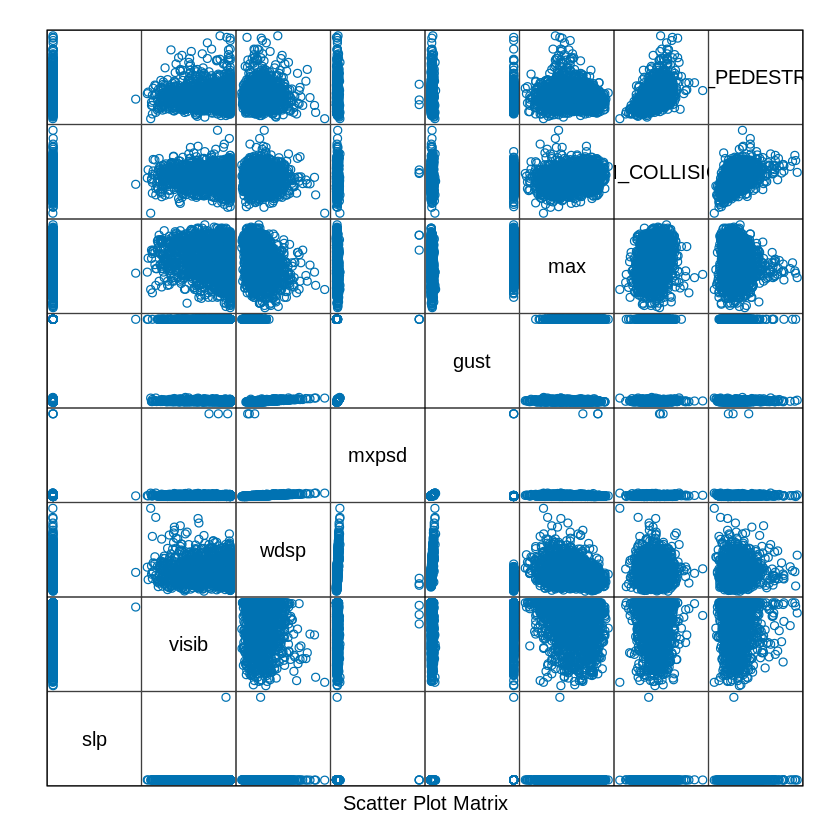

In [ ]:
splom(~ prelst[,c(10,11,12,13,14,15,24, 25)], groups=NULL, data=prelst,
axis.line.tck=0, axis.text.alpha=0)

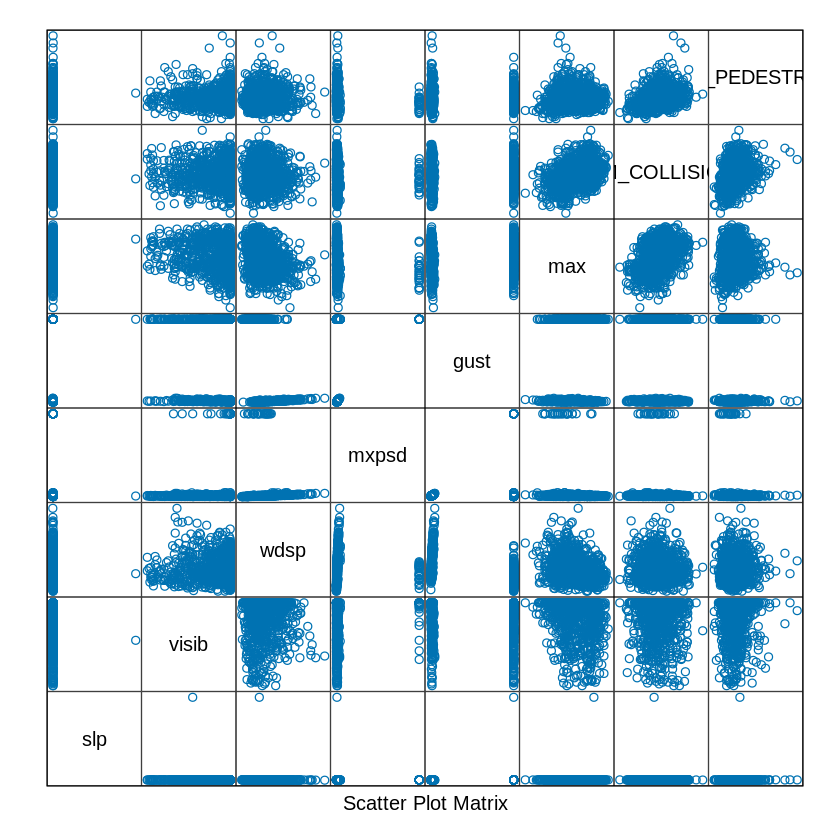

In [ ]:
splom(~ pstlst[,c(10,11,12,13,14,15,24, 25)], groups=NULL, data=pstlst,
axis.line.tck=0, axis.text.alpha=0)

From the corrolation matrix, apart from number of collisions and number of pedestrains there isnt a good corrolation between any of the listed headers. We can also see the outlaying data samples as well however from our previous corrolation matrix it isnt worth diving further into the data set.

This is dissapointing result, I had assumed when making creating the orignal data extract from big query that with reduced visability there would be more collisions involving pedestrains which would have provided us with a decent corrolation which could have been used in the model.

##Further Data Analysis

We will now look into post covid data further, split the data into individual years and do some further analysis on the headers we have selected. Once we have fine tuned our data we will normilse our data using the min/max method.

Output:

*   tempclnpstadjlst



Now that we have our cleaned data, lets do some further analysis on the data, lets apply normalisation to our data sets. Lets start with a summary of the relevent columns.

#### Temp Further Analysis

In [ ]:
summary(clnprelst$NUM_COLLISIONS)
summary(clnpstlst$NUM_COLLISIONS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  355.0   531.0   600.0   595.9   660.0   799.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  202.0   258.0   283.0   284.6   311.0   375.0 

For this section we are only going to focus on the data for 2021 onwards - this will give us 3 years to work with. The reason for doing this is becasue of the working/commuting behavour has changed after covid and no longer follow the same patterms and pre covid.

Lets start by splitting the data into years.

In [ ]:
temp21 <- clnpstlst[which(clnpstlst$year == 2021), ]
temp22 <- clnpstlst[which(clnpstlst$year == 2022), ]
temp23 <- clnpstlst[which(clnpstlst$year == 2023), ]


Lets get the tempature plotted agained the day of the year, we know each year should be roughly the same however always good to double check to see if there are any anomalies.  

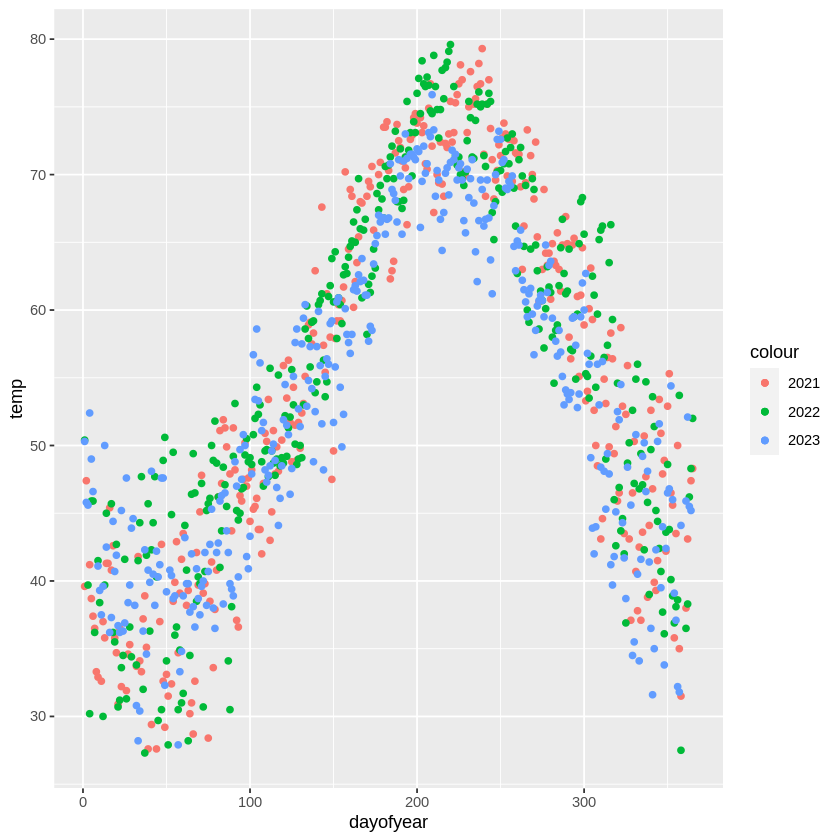

In [ ]:
ggplot() +
  geom_point(data=temp21, aes( dayofyear, temp, color="2021")) +
  geom_point(data=temp22, aes( dayofyear, temp, color="2022")) +
  geom_point(data=temp23, aes( dayofyear, temp, color="2023"))

As we can see there isnt really a big deviation apart from in winder, which has a bit more of a scattering of tempatures. This could be becuase of global warming and the increasing fluctiations in weather and storms. We can see that the latest, infact lets plot 2013 year temp and compair.

In [ ]:
temp13 <- clnprelst[which(clnpstlst$year == 2013), ]

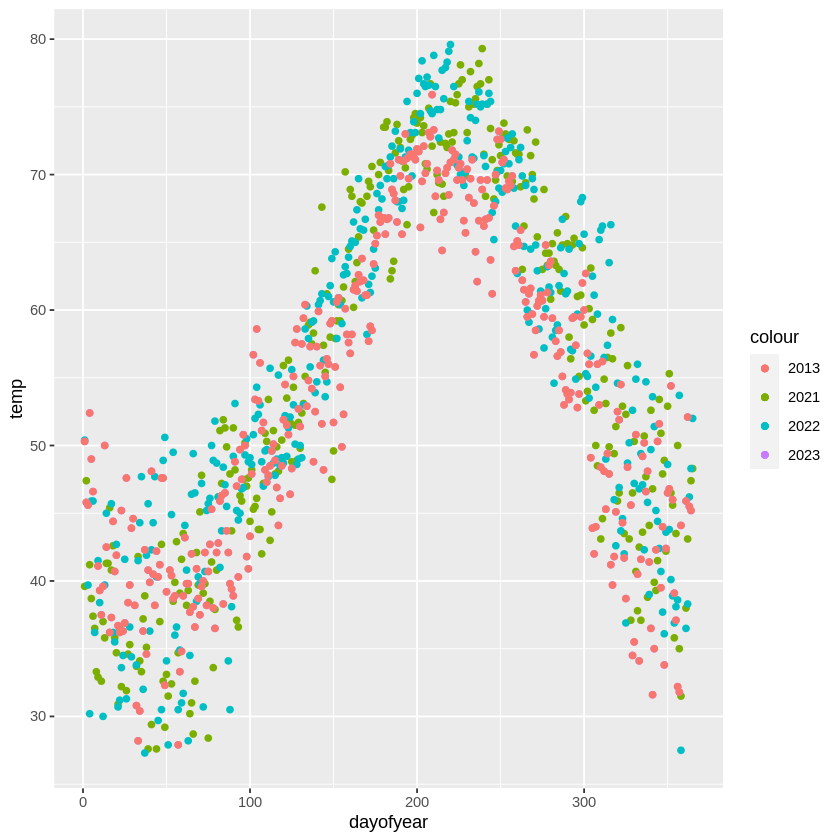

In [ ]:
ggplot() +
  geom_point(data=temp21, aes( dayofyear, temp, color="2021")) +
  geom_point(data=temp22, aes( dayofyear, temp, color="2022")) +
  geom_point(data=temp23, aes( dayofyear, temp, color="2023")) +
  geom_point(data=temp23, aes( dayofyear, temp, color="2013"))

As we can see there is still a wide scatting of of tempature ranges at the start of the year, however I think its clear from 2013 to 2023 that the temptature has generally increased over the last 10 years.
Lets remove the 2013 data and place the collisions into the graph.

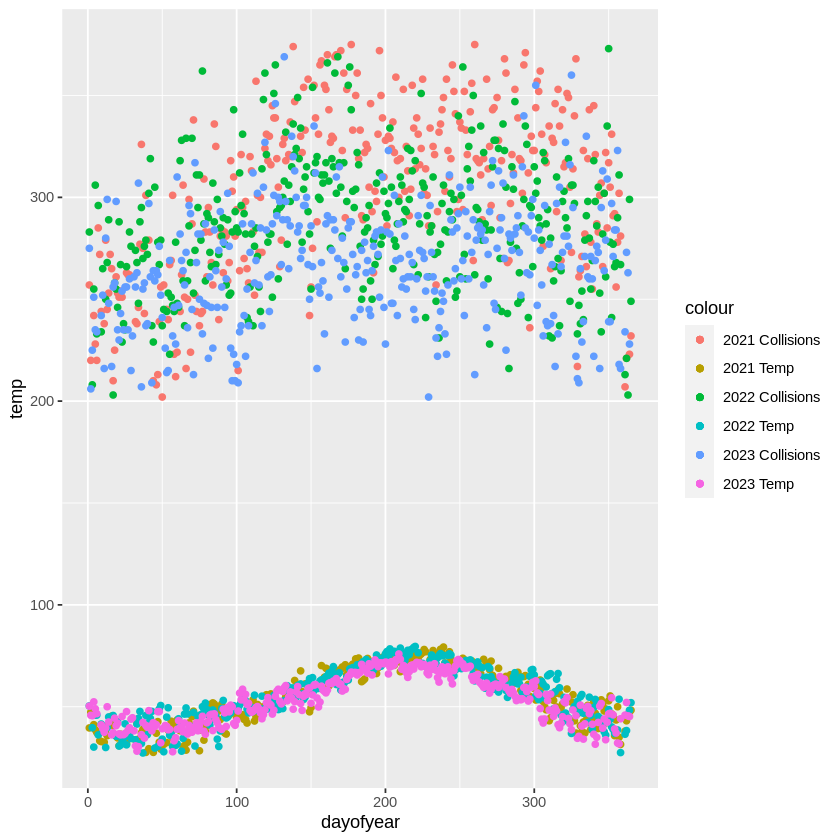

In [ ]:
ggplot() +
  geom_point(data=temp21, aes( dayofyear, temp, color="2021 Temp")) +
  geom_point(data=temp22, aes( dayofyear, temp, color="2022 Temp")) +
  geom_point(data=temp23, aes( dayofyear, temp, color="2023 Temp")) +
  geom_point(data=temp21, aes( dayofyear, NUM_COLLISIONS, color="2021 Collisions")) +
  geom_point(data=temp22, aes( dayofyear, NUM_COLLISIONS, color="2022 Collisions")) +
  geom_point(data=temp23, aes( dayofyear, NUM_COLLISIONS, color="2023 Collisions"))

This is a good visual representation of how the temperature impacts the number of collisions, the armer days increase the number of collisions.

An observation that I have made is that the number of collisions is not increase year on year, infact it looks like it has descreased in 2023, this could be a further shift from the traditonal working pattern and more remote working taking place, or the cost of living increasing resulting in fewer people commuting. Lets increase the year 2023 collisions bt 7.5% for a behavour adjustment.

In [ ]:
temp21$NUM_COLLISIONS <- temp21$NUM_COLLISIONS*0.95
temp23$NUM_COLLISIONS <- temp23$NUM_COLLISIONS*1.075

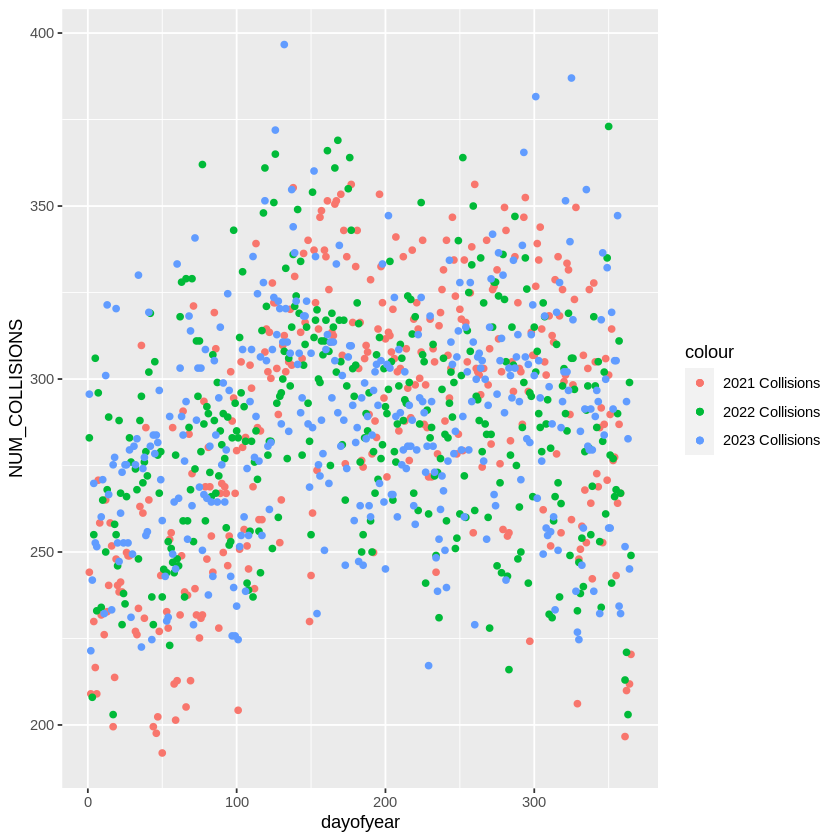

In [ ]:
ggplot() +
  geom_point(data=temp21, aes( dayofyear, NUM_COLLISIONS, color="2021 Collisions")) +
  geom_point(data=temp22, aes( dayofyear, NUM_COLLISIONS, color="2022 Collisions")) +
  geom_point(data=temp23, aes( dayofyear, NUM_COLLISIONS, color="2023 Collisions"))

I think this alligns our data lot more, and shoud give us a stronger corrolation between tempraturelet add the data backtogether and check the corrolation value.

In [ ]:
tempclnpstadjlst <- rbind( temp21,temp22, temp23)

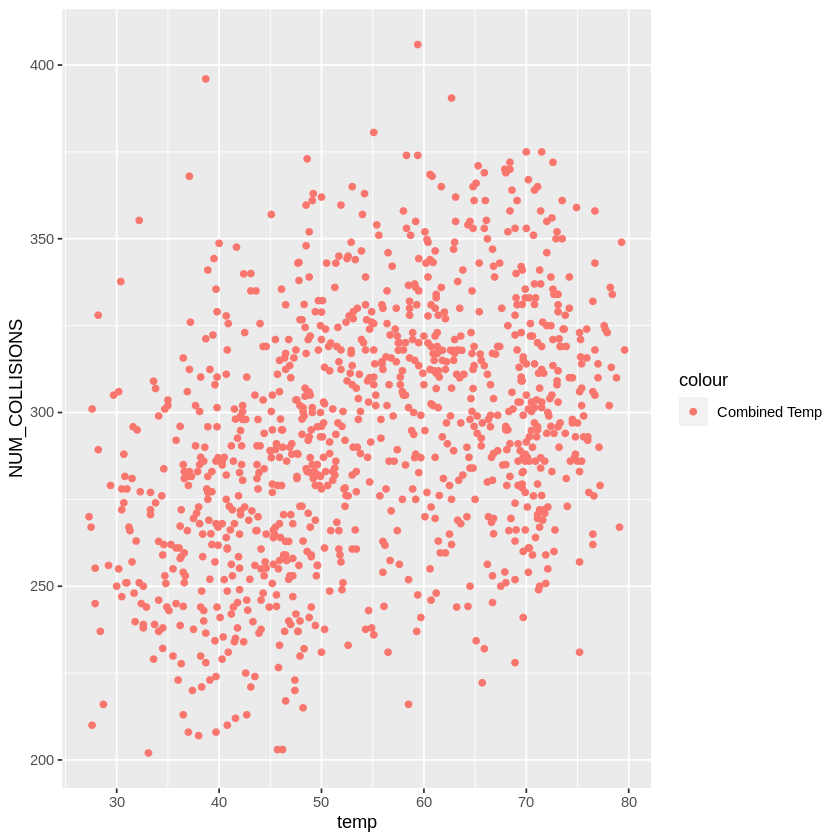

In [ ]:
ggplot() +
  geom_point(data=tempclnpstadjlst, aes( temp, NUM_COLLISIONS, color="Combined Temp"))


In [ ]:
cor(tempclnpstadjlst$temp , tempclnpstadjlst$NUM_COLLISIONS, method = "pearson")

[1] 0.3929571

# Results

Here we apply Min max normlisation to the number of collisions column and export the relevent data columns to CSV.


In [ ]:
tempnormclnpstlst <- tempclnpstadjlst

In [ ]:
tempnormclnpstlst$NUM_COLLISIONS <- (tempnormclnpstlst$NUM_COLLISIONS - min(tempnormclnpstlst$NUM_COLLISIONS)) / (max(tempnormclnpstlst$NUM_COLLISIONS)-min(tempnormclnpstlst$NUM_COLLISIONS))

In [ ]:
summary(tempnormclnpstlst$NUM_COLLISIONS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.3423  0.4693  0.4628  0.5767  1.0000 

In [ ]:
head(tempnormclnpstlst)

dayindex dayofyear day year mo da collision_date temp dewp slp    ⋯ min 
2923 2923     1         5   2021 1  1  01/01/2021     39.6 29.3 1029.3 ⋯ 33.1
2924 2924     2         6   2021 1  2  02/01/2021     47.4 42.5 1012.7 ⋯ 33.1
2926 2926     4         1   2021 1  4  04/01/2021     41.2 37.8 1011.2 ⋯ 39.0
2927 2927     5         2   2021 1  5  05/01/2021     38.7 36.1 1009.7 ⋯ 37.0
2928 2928     6         3   2021 1  6  06/01/2021     37.4 31.2 1009.5 ⋯ 35.1
2929 2929     7         4   2021 1  7  07/01/2021     36.5 26.1 1012.8 ⋯ 33.1
     prcp sndp  fog rain_drizzle snow_ice_pellets hail thunder NUM_COLLISIONS
2923 0.13 999.9 0   0            0                0    0       0.25515810    
2924 0.56 999.9 1   1            0                0    0       0.08350629    
2926 0.40 999.9 0   1            0                0    0       0.18556953    
2927 0.14 999.9 0   1            0                0    0       0.12062019    
2928 0.01 999.9 0   1            1                0    0       0.08350629    
2929 0.00 999.9 0   0            0                0    0       0.38505677    
     NUM_PEDESTRIANS
2923 21             
2924 21             
2926 21             
2927 16             
2928 11             
2929 19

In [ ]:
tempexport <- tempnormclnpstlst[,c(1,2,3,4,5,8,9,24)]

In [ ]:
head(tempexport)

dayindex dayofyear day year mo temp dewp NUM_COLLISIONS
2923 2923     1         5   2021 1  39.6 29.3 0.25515810    
2924 2924     2         6   2021 1  47.4 42.5 0.08350629    
2926 2926     4         1   2021 1  41.2 37.8 0.18556953    
2927 2927     5         2   2021 1  38.7 36.1 0.12062019    
2928 2928     6         3   2021 1  37.4 31.2 0.08350629    
2929 2929     7         4   2021 1  36.5 26.1 0.38505677

In [ ]:
write.csv(tempexport, file="055756_temp_ass_data.csv")

In [ ]:
dewpnormclnpstlst <- dewpclnpstlst

In [ ]:
dewpnormclnpstlst$NUM_COLLISIONS <- (dewpnormclnpstlst$NUM_COLLISIONS - min(dewpnormclnpstlst$NUM_COLLISIONS)) / (max(dewpnormclnpstlst$NUM_COLLISIONS)-min(dewpnormclnpstlst$NUM_COLLISIONS))

In [ ]:
head(dewpnormclnpstlst)

dayindex dayofyear day year mo da collision_date temp dewp slp    ⋯ min 
2923 2923     1         5   2021 1  1  01/01/2021     39.6 29.3 1029.3 ⋯ 33.1
2924 2924     2         6   2021 1  2  02/01/2021     47.4 42.5 1012.7 ⋯ 33.1
2926 2926     4         1   2021 1  4  04/01/2021     41.2 37.8 1011.2 ⋯ 39.0
2927 2927     5         2   2021 1  5  05/01/2021     38.7 36.1 1009.7 ⋯ 37.0
2928 2928     6         3   2021 1  6  06/01/2021     37.4 31.2 1009.5 ⋯ 35.1
2929 2929     7         4   2021 1  7  07/01/2021     36.5 26.1 1012.8 ⋯ 33.1
     prcp sndp  fog rain_drizzle snow_ice_pellets hail thunder NUM_COLLISIONS
2923 0.13 999.9 0   0            0                0    0       0.29569892    
2924 0.56 999.9 1   1            0                0    0       0.09677419    
2926 0.40 999.9 0   1            0                0    0       0.21505376    
2927 0.14 999.9 0   1            0                0    0       0.13978495    
2928 0.01 999.9 0   1            1                0    0       0.09677419    
2929 0.00 999.9 0   0            0                0    0       0.44623656    
     NUM_PEDESTRIANS
2923 21             
2924 21             
2926 21             
2927 16             
2928 11             
2929 19

In [ ]:
dewpexport <- dewpnormclnpstlst[,c(1,2,3,4,5,8,9,24)]

In [ ]:
head(dewpexport)

dayindex dayofyear day year mo temp dewp NUM_COLLISIONS
2923 2923     1         5   2021 1  39.6 29.3 0.29569892    
2924 2924     2         6   2021 1  47.4 42.5 0.09677419    
2926 2926     4         1   2021 1  41.2 37.8 0.21505376    
2927 2927     5         2   2021 1  38.7 36.1 0.13978495    
2928 2928     6         3   2021 1  37.4 31.2 0.09677419    
2929 2929     7         4   2021 1  36.5 26.1 0.44623656

In [ ]:
write.csv(dewpexport, file="055756_dewp_ass_data.csv")

We have now exported both data sets for dew point and temperature. I have not combined the data because as we have removed some rows due to the outlaying datapoints.

# Conclusion

We have managed to produce two strong corrlations between the number of collisions, one with temprature and one with dew points. I was honestly a little disappointed that the other data columns selected didnt prove to be too useful, for example the visability, rain or number of pedestrians involved within a collision. I had expected there to be more incidents with server weather however this was not the case. It shows that the trend tends to be that colder weather produce less collisions where as decent warm weather causes more collisions.  
The data sets produced did have a string corrolation however I beleive that if we had some additonal data like - change of air pressure on the day we could have more conclusive results.
Covid also introduced an interesting dataset and change behavour which has effected the whole world.